# __< 다이아몬드 가격 예측 >__

> 당연하다고 인식되는 것을 증명! 다이아몬드는 캐럿과 관계있다를 눈으로 확인!


### __데이터 컬럼 설명__

- carat : 캐럿 (중량) 
| 다이아몬드 캐럿은 다이아몬드의 무게를 측정합니다         
| 0.2 ~ 5.01

- cut : 컷팅 
| 다이아몬드 컷은 다이아몬드의 면이 빛과 얼마나 잘 상호 작용하는지를 의미합니다               
| (하) Fair, Good, Very Good, Premium, Ideal (상)             

- color : 색 
| 화학적으로 순수하고 구조적으로 완벽한 다이아몬드는 순수한 물 한 방울과 같은 색조가 없으므로 결과적으로 더 높은 가치가 있습니다. (D~Z)             
| (상) D E F G H I J  (하)

- clarity : 투명도 
| 다이아몬드 선명도는 내포물 및 흠이 없음을 나타냅니다. (I1~IF)            
| (상) IF , VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (하)

- depth : total depth percentage 계산식 = z / mean(x, y) 
| [ 2 * z / (x + y) ]               
| 43 ~ 79

- table : 다이아몬드 테이블 
| width of top of diamond relative to widest point(%)          
| 43 ~ 95

- price : 가격 
| 단위 $             
| 326 ~ 18823

- x : 측정 길이 length 
| 단위 mm          
| 3.73 ~ 10.74

- y : 측정 너비 width
| 단위 mm             
| 3.68 ~ 58.9

- z : 측정 깊이 depth
| 단위 mm              
| 1.07 ~ 31.8

> 설명 출처 : https://4cs.gia.edu/en-us/4cs-diamond-quality/

<br>
<br>

---

<br>
<br>
<br>

# __다이아몬드 데이터 탐색__

<br>

## 환경 Setting (패키지 다운로드)

In [2]:
import pandas as pd
import numpy as np

# 그래프
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 한글 폰트 문제 해결 
import platform # os정보
from matplotlib import font_manager, rc # 폰트 관리 모듈, 폰트 변경 모듈
plt.rcParams['axes.unicode_minus'] = False # unicode 설정

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 mac os
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

<br>

## 데이터 불러오기 및 정보 확인

### 다이아몬드 데이터 Import

In [4]:
diamonds = pd.read_csv("DiamondsPrices2022.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


> 이상한 컬럼 Unnamed: 0 존재함을 확인했다.        
인덱스 데이터로 추정된다. 어떤 데이터 인지 확인하고 의미없는 데이터이면 삭제한다.

In [5]:
diamonds['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53938    53939
53939    53940
53940    53941
53941    53942
53942    53943
Name: Unnamed: 0, Length: 53943, dtype: int64

> Unnamed는 인덱스 데이터로 확인했으므로 Drop한다.

In [6]:
diamonds.drop("Unnamed: 0", axis= 1 , inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 데이터셋의 null 유/무 , Data Type, row 갯수 등을 확인한다

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


> row Count수와 non-null의 갯수가 같으므로 null값이 없다.          
> 각 컬럼의 성격에 맞는 데이터 타입(dtype)이 알맞게 되어 있다. _(object : 문자형 , int64 & float64 : 수치형)_        
> 53943개의 row를 가지고 있다            

### 수치형 데이터 확인하기

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> Target Column(예측목표)인 가격(price)컬럼을 제외한 나머지 컬럼은 평균과 중앙값이 비슷하다. _(정규분포)_   
> x , y , z 컬럼은 측정 데이터인데 최소값에 0이 보인다.   
__측정되지 않은 데이터로 보이며 채울수 있는 식이나 정보가 없으므로 사용할 수 없는 데이터로 판단한다. 0 데이터 정제가 필요하다.__            

### 카테고리형 데이터 확인하기

In [9]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


> 잘못된 데이터 없이 각 컬럼에 맞는 데이터로 잘 들어가 있다.

### 카테고리 컬럼의 각 데이터 빈도수 확인하기

In [10]:
colums = ['cut' , 'color' , 'clarity']

for col in colums:
   print("Column Name :", col)
   print(diamonds[col].value_counts().sort_values())
   print("--------------------------------")

Column Name : cut
Fair          1610
Good          4906
Very Good    12083
Premium      13793
Ideal        21551
Name: cut, dtype: int64
--------------------------------
Column Name : color
J     2808
I     5422
D     6775
H     8304
F     9543
E     9799
G    11292
Name: color, dtype: int64
--------------------------------
Column Name : clarity
I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12259
SI1     13067
Name: clarity, dtype: int64
--------------------------------


<br>

##### __카테고리형 , 범주형 데이터를 정제할때 확인할 점__


> __Q )__ 카테고리형 컬럼을 원핫인코딩으로 정제하는게 좋을지 , 단계별 숫자를 할당 (ex.'Very Good' 'Good' 'Fair' -> 3,2,1) 해서 하는게 좋을지 어떻게 판단하나요?      
> __A )__ __순서에 의미가 있으면 숫자로 변환__ 하면 됩니다. 0이 아닌 1부터 시작하는게 좋습니다. __순서에 의미가 없는__ '성별' 같은 범주형 데이터에는 __원핫인코딩__ 을 해야합니다.



<br>
<br>

---

## 데이터 정제

### x, y, z 컬럼의 0 데이터 갯수 확인 및 삭제

In [11]:
len(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index)

20

> 0값 데이터 20개로 확인.  
총 데이터 5만4천개에 영향이 미미할 정도로 갯수가 적고 , 다른 곳에서 계산할만한 자료가 없으므로 삭제한다.

In [12]:
diamonds.drop(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### 정제 후 다시 수치형 데이터 확인

In [13]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 20개 row 삭제 : 53923 rows × 10 columns             
> 데이터를 정제 한 후에도 평균과 중앙값이 비슷하다       



<br>

### 카테고리 컬럼 수치형으로 변환하기
- __Cut, Color, Clarity__
    - cut : 1 ~ 5
    - color : 1 ~ 7
    - clarity : 1 ~ 8

In [14]:
# 원 데이터 보존을 위해 데이터 변환용 복사
diamondsV2 = diamonds.copy()

In [15]:
diamondsV2['cut'] = diamondsV2['cut'].map({"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5})
diamondsV2['color'] = diamondsV2['color'].map({"D" : 7 ,"E" : 6 ,"F" : 5 ,"G" : 4 , "H" : 3 , "I" : 2 , "J" : 1})
diamondsV2['clarity'] = diamondsV2['clarity'].map({"IF" : 8 , "VVS1" : 7 , "VVS2" : 6 , "VS1" : 5 , "VS2" : 4 , "SI1" : 3 , "SI2" : 2 , "I1" : 1})

In [16]:
# 변환 확인
diamondsV2.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


<br>

##### __데이터 정규화 , 표준화 할 때 확인해야할 점__

수치형 데이터를 머신러닝, 딥러닝에 사용하기 위해서는 때에 따라 정규화 *(컬럼 한개씩 적용)* , 표준화 *(전체 컬럼에 일괄 적용)* 가 필요하다.             

다이아몬드 데이터의 경우          
- X , Y , Z 컬럼은 같은 단위로 측정한 컬럼(mm)이기 때문에 한번에 같이 스케일(정규화) 하면 된다.           
- Depth는 x,y,z 데이터로 계산한 계산식이 있기 때문에 정규화한 x,y,z데이터로 다시 계산하여 정규화ver Depth컬럼을 만든다.              
- Table은 계산식이 없고, Percentage 데이터이기 때문에 100으로 나눠 정규화 한다.            
- Carat은 계산식이나, 같은 단위의 컬럼이 없기 때문에 (min,max) 정규화를 해준다. (보통 max로 많이 한다)            

<br>

---

<br>
<br>
<br>

## 데이터 시각화

#### 그래프에 사용하기 위한 좋음 - 나쁨 순서로 Order List 만들기

In [17]:
cut_order = [ "Ideal" , "Premium" , "Very Good" , "Good", "Fair"]
color_order = ["D", "E", "F", "G", "H", "I", "J"]
clarity_order = ["IF", "VVS1", "VVS2" , "VS1" , "VS2" , "SI1" , "SI2", "I1"]

<br>

### 전체 컬럼에 대한 PairPlot(산점도 행렬)

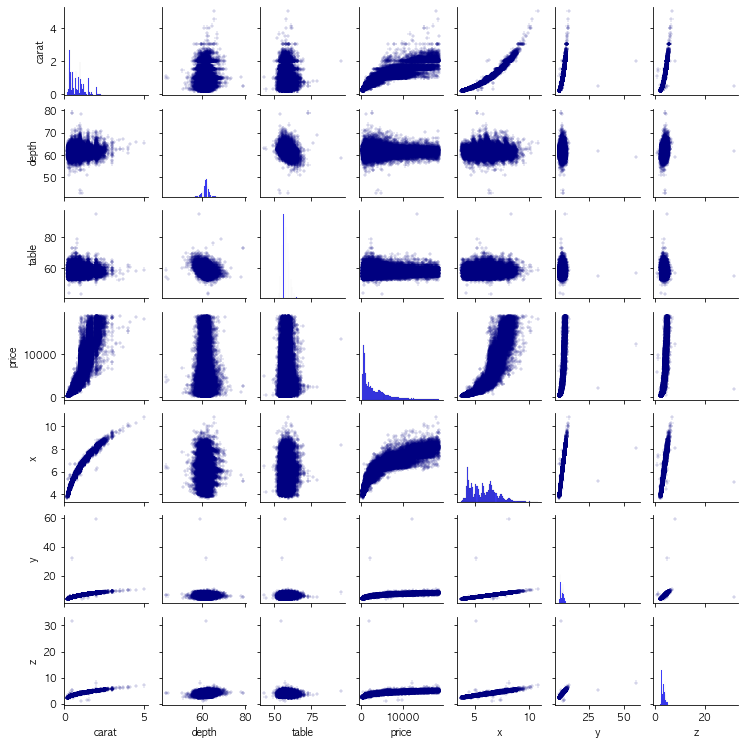

In [18]:
sns.pairplot(
    diamonds,
    plot_kws = dict(marker = "+", alpha = 0.5, color = 'navy' , size = 0.1), 
    diag_kws = dict(color = 'blue'),
    height= 1.5,
    )

plt.show()

<br>


### BoxPlot (상자수염 그래프) - 컬럼별로 확인

>  __Box Plot으로 이상치 확인시 주의할점__         
> 박스 밖에 데이터가 있어도, 연속적으로 있다면 이상치가 아니라고 판단할 수 있다. 그래프의 박스사이즈 길이 보다 멀리 떨어져 있으면 이상치이다.

In [19]:
# 테마 설정
sns.set_theme(style="whitegrid", palette="Pastel1")

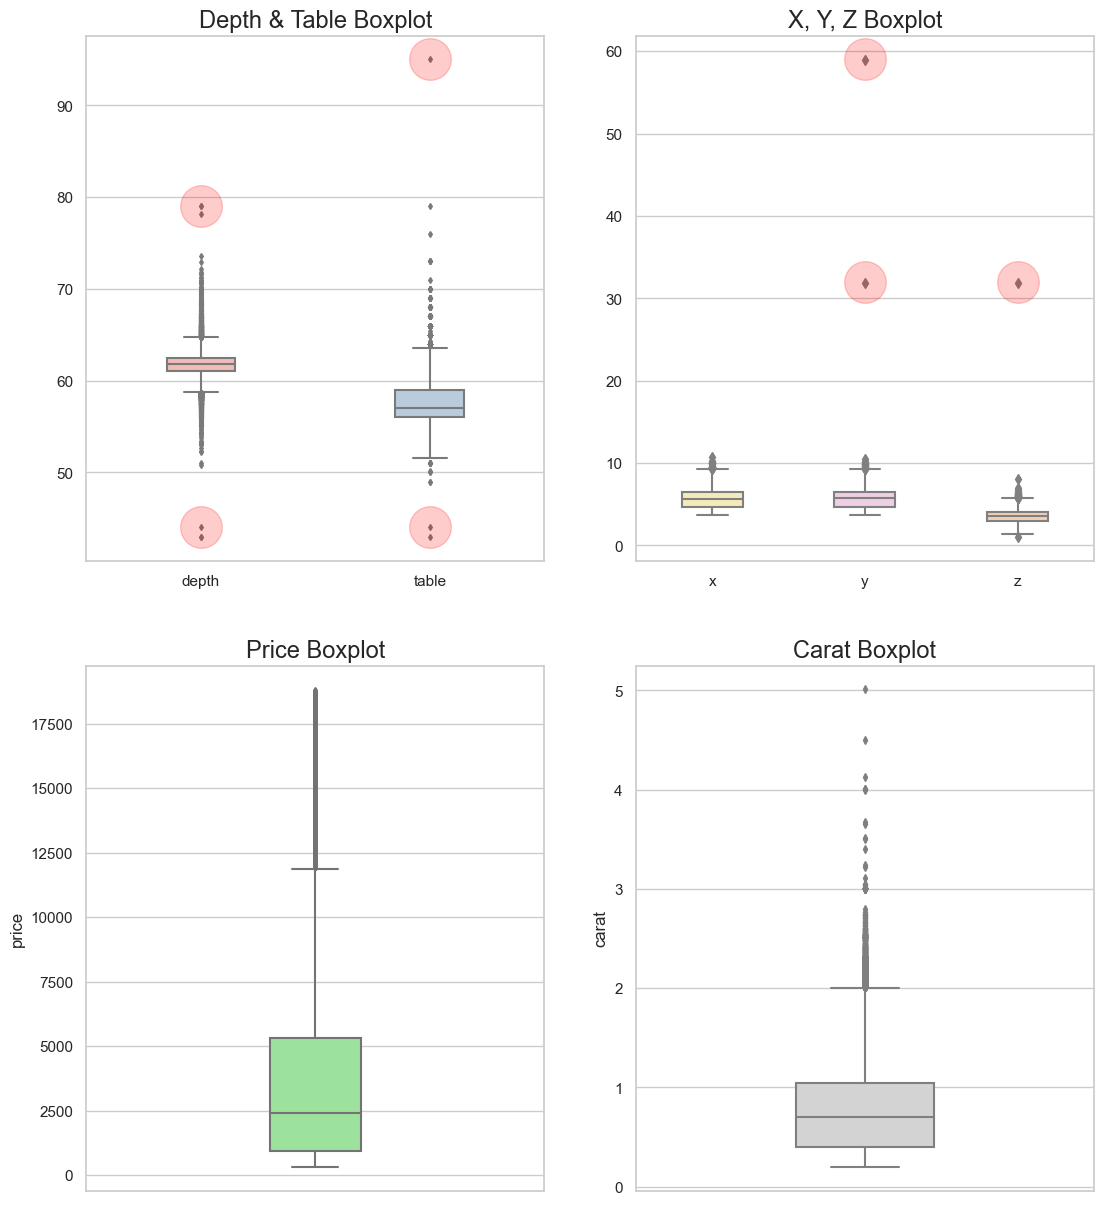

In [20]:
fig = plt.figure(figsize=(13,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(
    data = diamonds[['depth','table']],
    ax = ax1,
    width= 0.3,
    fliersize= 3
) 
# 이상치 표시 
ax1.plot([0,0,1,1] , [79,44,95,44] , marker = 'o' , color = 'red' , markersize = 30 , alpha = 0.2 , ls = "" )

sns.boxplot(
    data = diamonds[['x','y','z']],
    ax = ax2,
    palette= 'Pastel2_r',
    width= 0.4,
) 
# 이상치 표시
ax2.plot([2,1,1] , [32,32,59] , marker = 'o' , color = 'red' , markersize = 30 , alpha = 0.2 , ls = "" ) #, markerfacecolor = "white"

sns.boxplot(
    y = diamonds['price'],
    ax = ax3,
    color= 'lightgreen',
    width= 0.2,
    fliersize= 2
) 

sns.boxplot(
    y = diamonds['carat'],
    ax = ax4,
    color= 'lightgray',
    width= 0.3,
    fliersize= 4
) 

ax1.set_title('Depth & Table Boxplot' , size = 17)
ax2.set_title('X, Y, Z Boxplot' , size = 17)
ax3.set_title('Price Boxplot' , size = 17)
ax4.set_title('Carat Boxplot' , size = 17)
plt.show()

> depth, table, x, y, z 컬럼에서 이상치 제거가 필요하다.          
> 정제 범위 : depth (48~75) , table (45~80) , y (0~20) , z (0~10)

### 이상치 제거

In [21]:
diamonds.drop(diamonds[(diamonds['depth'] < 48) | (diamonds['depth'] > 75)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['table'] < 45) | (diamonds['table'] > 80)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['y'] > 20)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['z'] > 10)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


> 12개 row가 삭제 되었다

In [22]:
# 카테고리 컬럼 정제한 데이터도 이상치 제거
diamondsV2.drop(diamondsV2[(diamondsV2['depth'] < 48) | (diamondsV2['depth'] > 75)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['table'] < 45) | (diamondsV2['table'] > 80)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['y'] > 20)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['z'] > 10)].index , inplace= True)

이상치 정제와 카테고리컬럼 변환이 끝난 데이터 CSV로 저장하기

In [23]:
diamondsV2.to_csv("diamonds_preprocessing.csv", index=False)

<br>


### 이상치 제거 후 박스플랏 확인

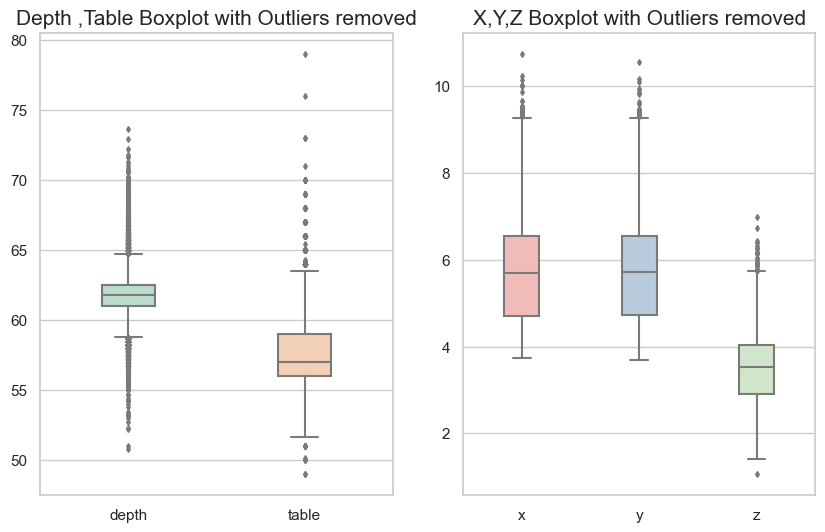

In [24]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(
    data = diamonds[['depth','table']],
    ax = ax1,
    width= 0.3,
    fliersize= 3,
    palette= 'Pastel2'
) 

sns.boxplot(
    data = diamonds[['x','y','z']],
    ax = ax2,
    width= 0.3,
    fliersize= 3
) 

ax1.set_title('Depth ,Table Boxplot with Outliers removed' , size = 15)
ax2.set_title('X,Y,Z Boxplot with Outliers removed' , size = 15)
plt.show()

<br>
<br>
<br>

### 카테고리 컬럼 등급별 데이터 갯수(Value Counts)의 __막대그래프__

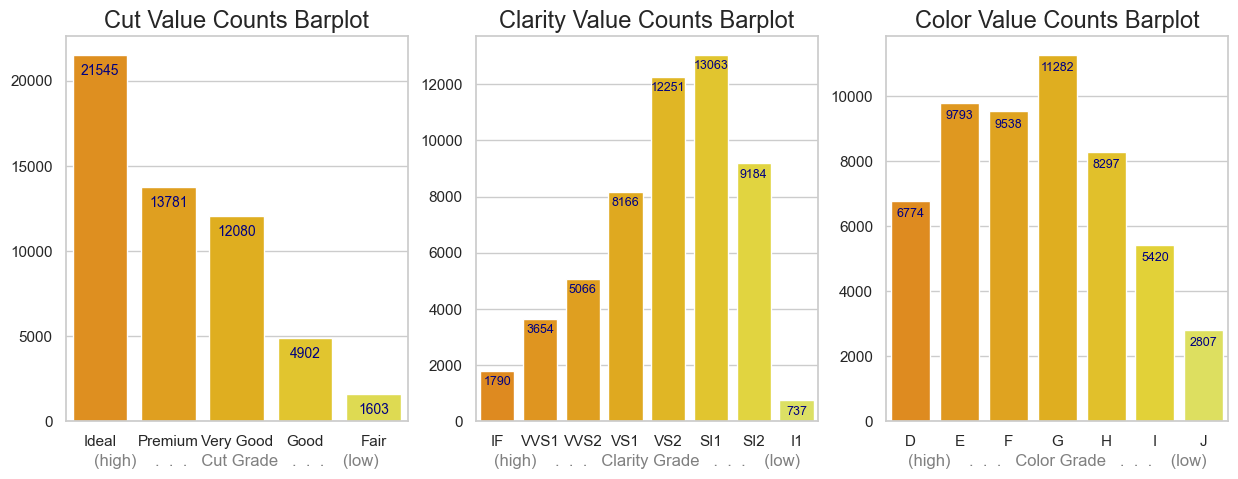

In [25]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(
    x = diamonds['cut'].value_counts().index,
    y = diamonds['cut'].value_counts().to_numpy(),
    order = cut_order,
    palette = "Wistia_r",
    ax = ax1
)
sns.barplot(
    x = diamonds['clarity'].value_counts().index,
    y = diamonds['clarity'].value_counts().to_numpy(),
    order = clarity_order,
    palette = "Wistia_r",
    ax = ax2
)
sns.barplot(
    x = diamonds['color'].value_counts().index,
    y = diamonds['color'].value_counts().to_numpy(),
    order = color_order,
    palette = "Wistia_r",
    ax = ax3
)

# 그래프 제목 , 축
ax1.set_title("Cut Value Counts Barplot", size = 17)
ax2.set_title("Clarity Value Counts Barplot", size = 17)
ax3.set_title("Color Value Counts Barplot", size = 17)
ax1.set_xlabel("(high)    .  .  .   Cut Grade   .  .  .    (low)" , color = 'gray' , size = 12)
ax2.set_xlabel("(high)    .  .  .   Clarity Grade   .  .  .    (low)", color = 'gray' , size = 12)
ax3.set_xlabel("(high)    .  .  .   Color Grade   .  .  .    (low)", color = 'gray' , size = 12)

# 그래프에 글자 출력용 리스트,딕셔너리
cut_vl = diamonds['cut'].value_counts().to_list()
clarity_vd = diamonds['clarity'].value_counts().to_dict()
color_vd = diamonds['color'].value_counts().to_dict()
clarity_vl = []
color_vl = []
axlist = [(ax2 ,clarity_vd,clarity_order), (ax3, color_vd , color_order)]

# 그래프에 텍스트 값 출력
for index , value in enumerate(cut_vl): # ax1
    ax1.annotate(value , xy = (index , value-1200), color='navy', ha="center" ,va = 'baseline',fontsize = 10)
for ax in axlist: # ax2 , ax3
    for index , value in enumerate(ax[2]): # ax[1] : dict , ax[2] : order -> 등급순으로 출력하기 위함
        ax[0].annotate(ax[1][value] , xy = (index , ax[1][value]-500), color='navy', ha="center" , va = 'baseline',fontsize = 9)
        if ax[0] == ax2:
            clarity_vl.append(ax[1][value])
        else:
            color_vl.append(ax[1][value]) 

plt.show()

### 카테고리 컬럼별 Value Counts를 `비율`로 보기 위한 PiePlot 

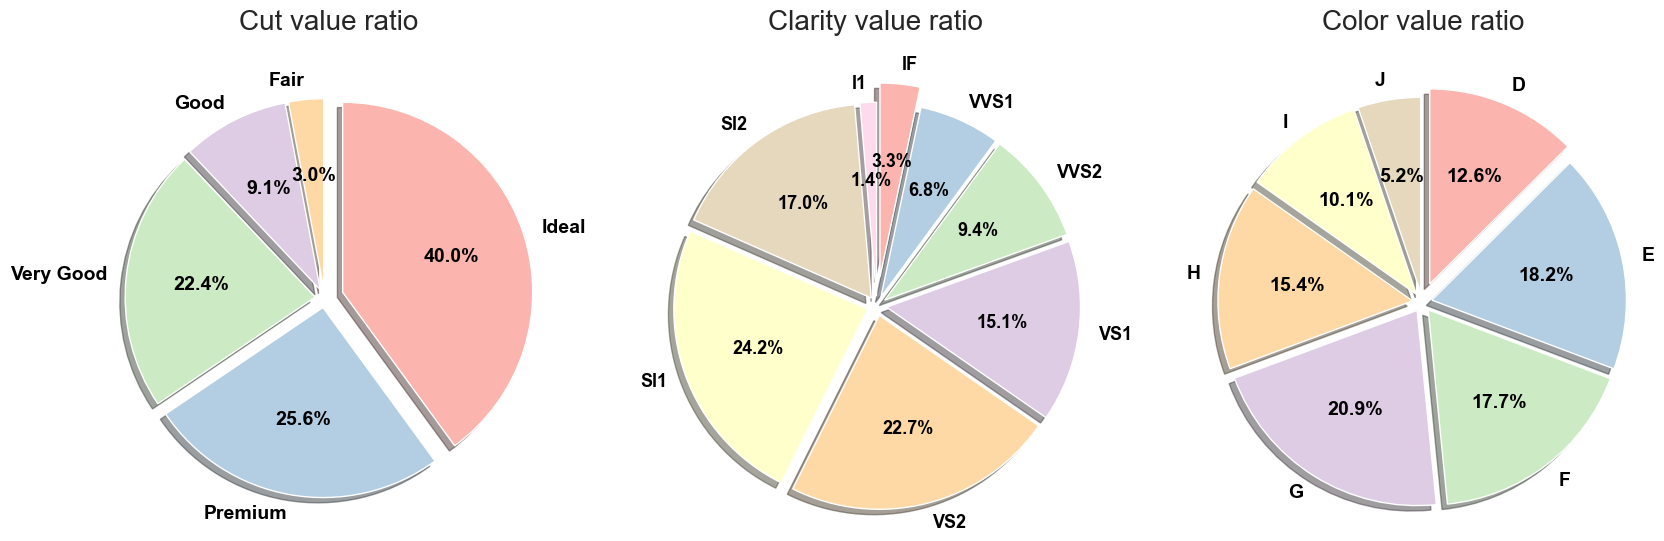

In [26]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(
    cut_vl,
    autopct = '%.1f%%',
    startangle = 90, # 시작 각도
    counterclock = False,
    explode = [0.10, 0.05, 0.05, 0.05 , 0.05],
    shadow = True,
    textprops = dict(color = 'black', fontsize = 14 , fontweight = 'bold'),
    labels = cut_order,
    )
ax2.pie(
    clarity_vl,
    autopct = '%.1f%%',
    startangle = 90, # 시작 각도
    counterclock = False,
    explode = [0.15, 0.05, 0.05, 0.05 , 0.05, 0.05, 0.05 , 0.05],
    shadow = True,
    textprops = dict(color = 'black', fontsize = 13 , fontweight = 'bold'),
    labels = clarity_order,
    )
ax3.pie(
    color_vl,
    autopct = '%.1f%%',
    startangle = 90, # 시작 각도
    counterclock = False,
    explode = [0.10, 0.05, 0.05, 0.05 , 0.05, 0.05 , 0.05],
    shadow = True,
    textprops = dict(color = 'black', fontsize = 14 , fontweight = 'bold'),
    labels = color_order,
    )

ax1.set_title('Cut value ratio\n' , size = 20)
ax2.set_title('Clarity value ratio\n' , size = 20)
ax3.set_title('Color value ratio\n' , size = 20)
ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show()

> Cut 컬럼의 경우 최상급 등급의 40%, 상위 두 등급으로 보면 60% 이상 차지하고 있어 등급의 상향평준화로 보인다.          
> 따라서 등급별로 가격 차등 구분이 불분명할 것으로 추측된다.          
> Color 컬럼이 그나마 가장 고르게 분포되어 보인다.
>> 가격 예측에 피쳐 컬럼으로 Cut은 사용하지 않을 가능성이 높아 보인다.             
>> 사람의 손으로 다룰 수 있는 것은 상향 평준화, 다이아몬드 자체의 색, 불순도는 사람이 컨트롤 할 수 없기 때문에 다양하게 있는 것으로 생각해 볼 수 있다.

<br>

### `[ Cut / Clarity / Color ] & 가격` 의  KDE(밀도) plot 

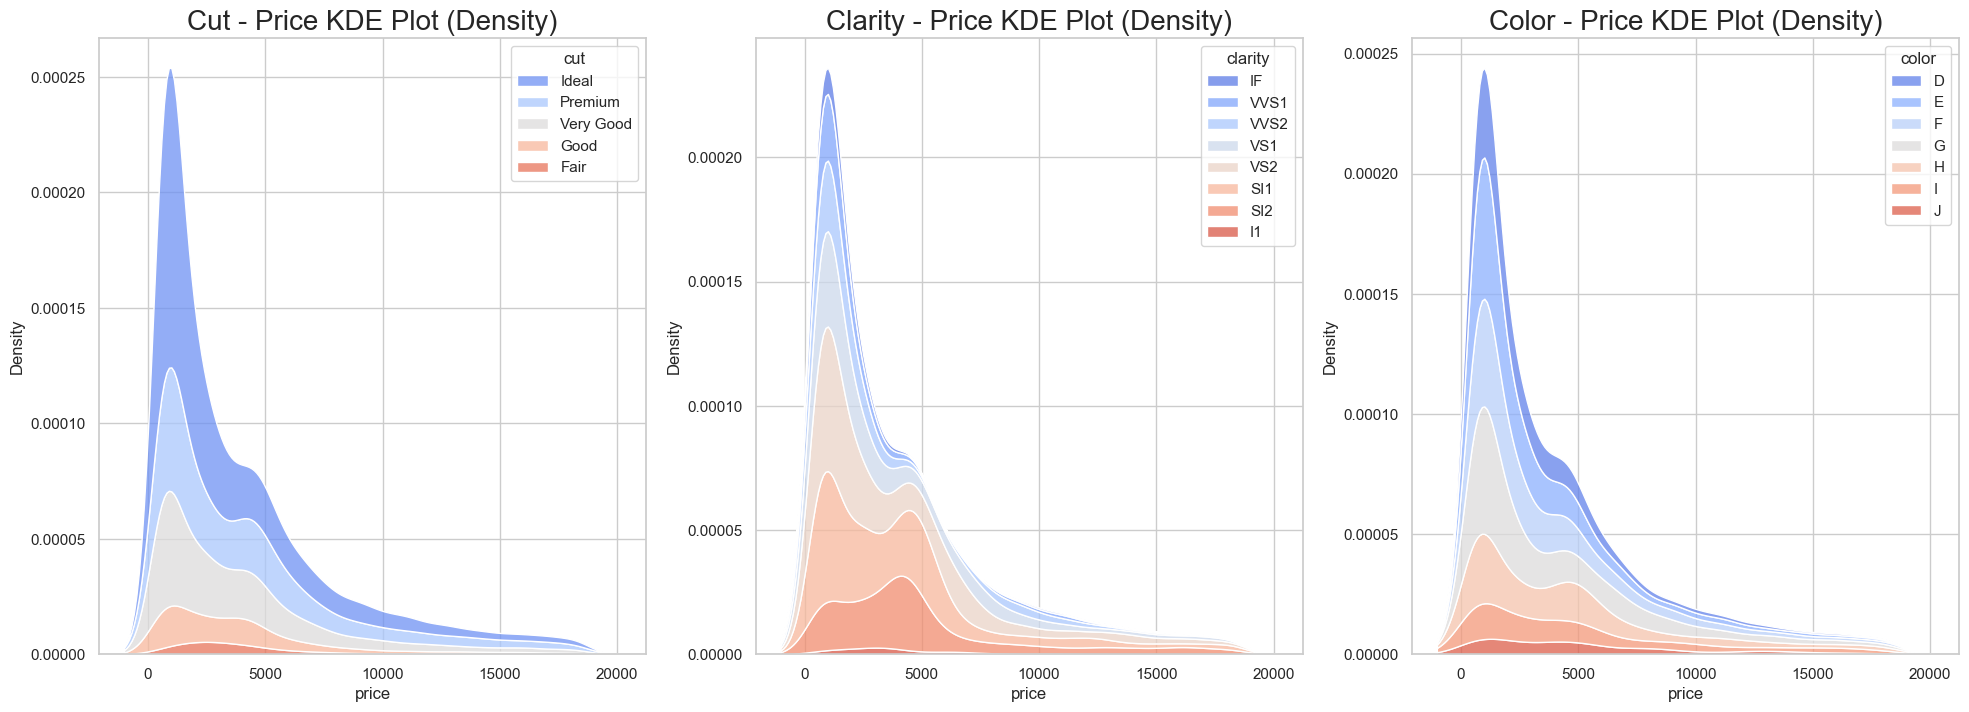

In [27]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="cut", 
    multiple="stack",
    hue_order= cut_order,
    ax = ax1,
    palette='coolwarm',
    )

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="clarity", 
    multiple="stack",
    hue_order= clarity_order,
    ax = ax2,
    palette='coolwarm',
    )

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="color", 
    multiple="stack",
    hue_order= color_order,
    ax = ax3,
    palette='coolwarm',
    )
    
ax1.set_title('Cut - Price KDE Plot (Density)' , size = 20 )
ax2.set_title('Clarity - Price KDE Plot (Density)', size = 20)
ax3.set_title('Color - Price KDE Plot (Density)', size = 20)
plt.show()

> 전체적으로 낮은 가격에 데이터가 몰려있다.               
> 등급별로 `가격의 범위`가 __나눠지는걸__ 예상했지만 예상과 달리 __모든 등급이 비슷한 가격 범위__ 를 보이고 있다.             

### `[ Cut / Clarity / Color ] & Carat(캐럿)`의 Violin Plot

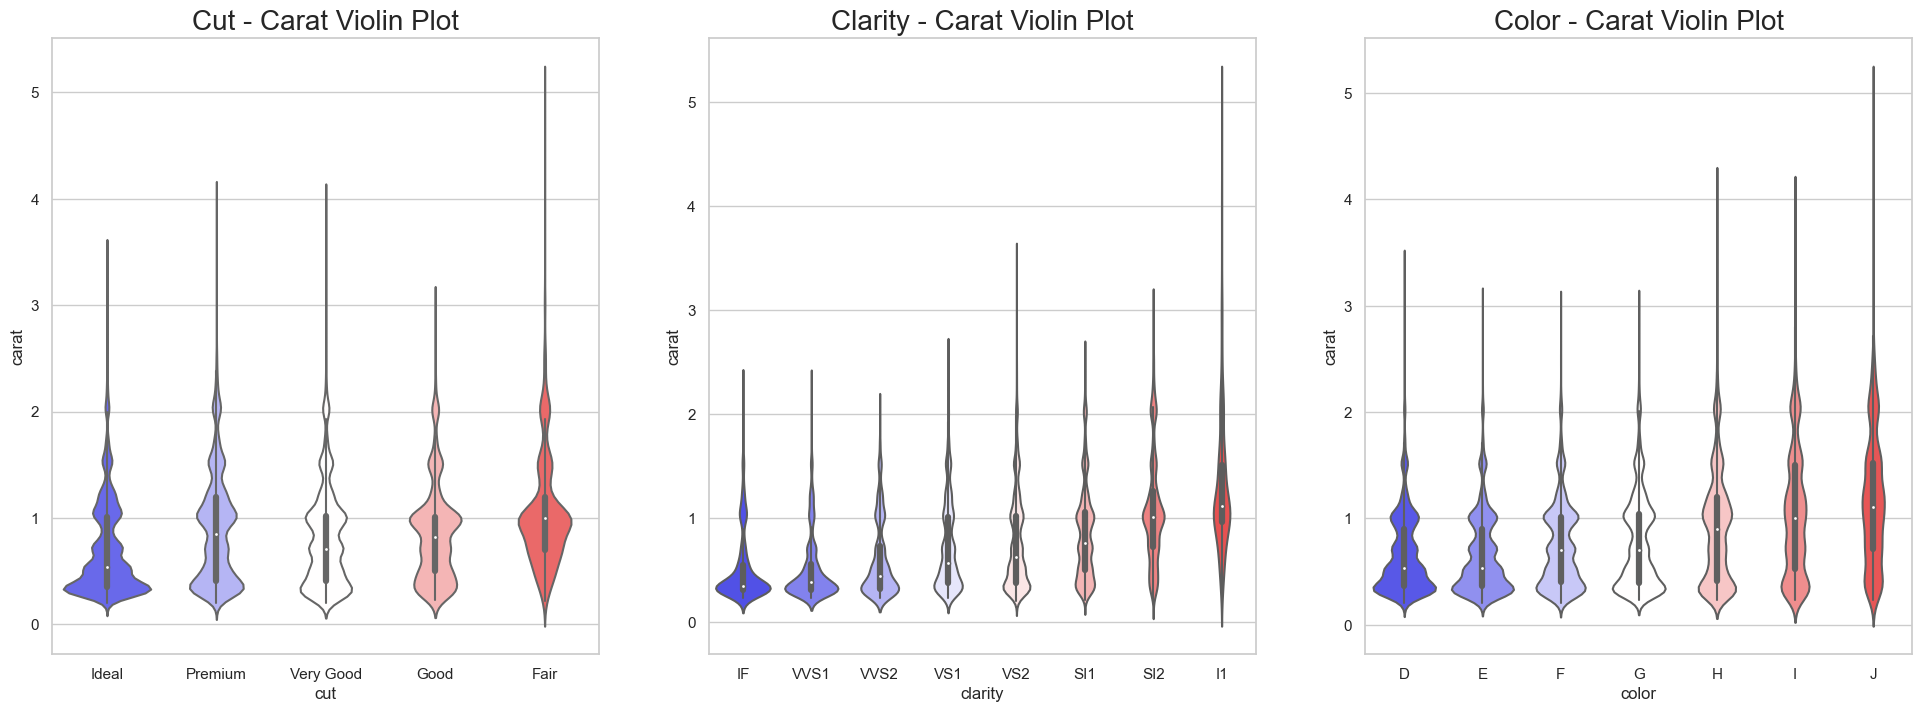

In [28]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.violinplot(
    'cut',
    'carat',
    data = diamonds,
    order= cut_order,
    ax=ax1,
    palette= 'bwr',
)
sns.violinplot(
    'clarity',
    'carat',
    data = diamonds,
    order= clarity_order,
    ax=ax2,
    palette= 'bwr',
)
sns.violinplot(
    'color',
    'carat',
    data = diamonds,
    order= color_order,
    ax=ax3,
    palette= 'bwr',
)

ax1.set_title('Cut - Carat Violin Plot' , size = 20)
ax2.set_title('Clarity - Carat Violin Plot', size = 20)
ax3.set_title('Color - Carat Violin Plot', size = 20)
plt.show()

> 전반적으로 높은 등급은 작은 캐럿 사이즈에 많이 몰려있고, 낮은 등급들이 캐럿 사이즈가 큰 추세를 보인다. 

### 캐럿 - 가격 산점도

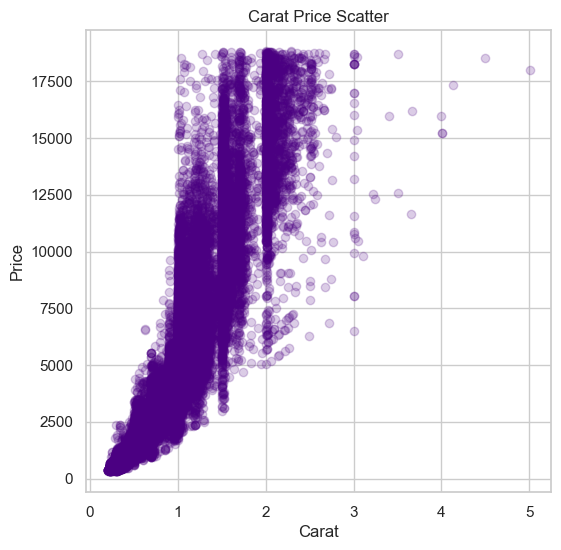

In [29]:
plt.figure(figsize = (6,6))
plt.scatter(
    'carat',
    'price',
    data = diamonds,
    alpha=0.2,
    color = "indigo",
)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat Price Scatter")
plt.show()

> 캐럿과 가격의 상관관계가 높아 보인다.              

> __위의 그래프들과 같이 보면 높은 등급이어도 캐럿이 작으면 가격이 낮고, 낮은 등급이어도 캐럿 사이즈가 훨씬 크게 되면 가격이 비싸지게 된다.         
> 따라서 캐럿이 반영되지 않은 그래프로는 등급별 가격을 확인할 수 없다.__  

<br>

### Price Per Carat (1캐럿 당 가격)와 카테고리 컬럼 막대 그래프

그래프를 위한 Price per Carat 컬럼 생성

In [30]:
diamonds_2 = diamonds.copy() 
diamonds_2['pricepercarat'] = round(diamonds_2['price']/diamonds_2['carat'])
diamonds_2 = diamonds_2.astype({'pricepercarat' : 'int64'})
diamonds_2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,pricepercarat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1422
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1152
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1081


> Price per Carat 컬럼은 그래프를 그리기 위한 컬럼이기 때문에 사본 데이터를 만들어 컬럼을 추가한다.                   
> *(Target 컬럼인 Price가 들어가 있기 때문에 분석에는 사용하지 못한다)*

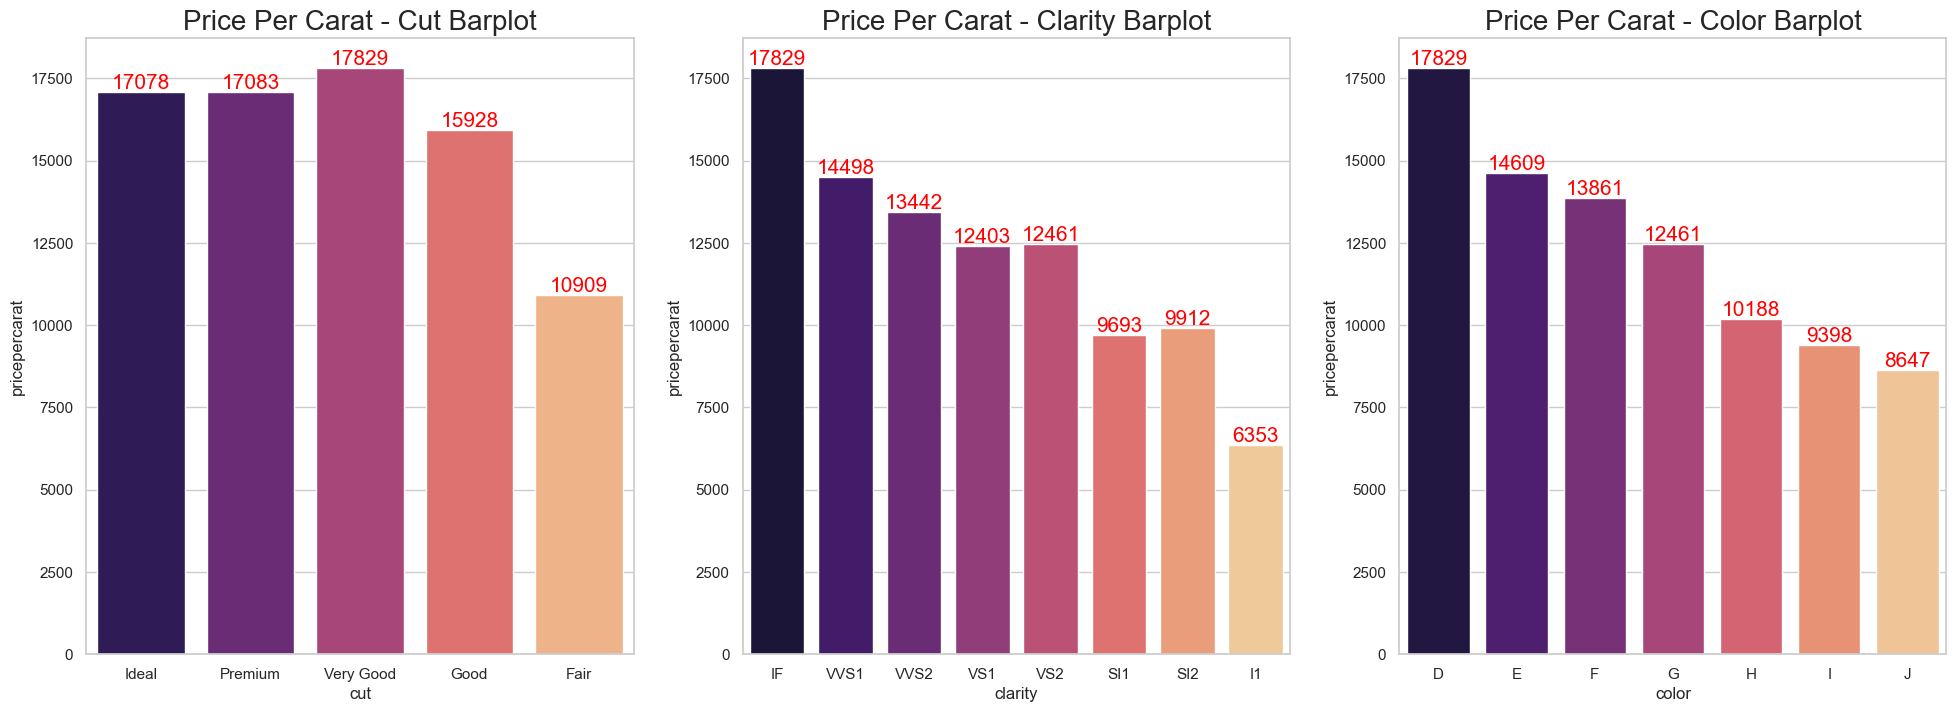

In [31]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x = 'cut',
    y = 'pricepercarat',
    data = diamonds_2,
    order = cut_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax1,
)
sns.barplot(
    x = 'clarity',
    y = 'pricepercarat',
    data = diamonds_2,
    order = clarity_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax2,
)
sns.barplot(
    x = 'color',
    y = 'pricepercarat',
    data = diamonds_2,
    order = color_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax3,
)
ax1.set_title('Price Per Carat - Cut Barplot' , size = 20)
ax2.set_title('Price Per Carat - Clarity Barplot' , size = 20)
ax3.set_title('Price Per Carat - Color Barplot', size = 20)

# 그래프에 값 출력
cut_max = diamonds_2[['pricepercarat','cut']].groupby('cut').max()
clarity_max = diamonds_2[['pricepercarat','clarity']].groupby('clarity').max()
color_max = diamonds_2[['pricepercarat','color']].groupby('color').max()

for index , value in enumerate(cut_order):
    ax1.annotate( cut_max.loc[value,'pricepercarat'] , xy = (index , cut_max.loc[value,'pricepercarat']+100), color='red', ha="center" ,va = 'baseline',fontsize = 15)
for index , value in enumerate(clarity_order):
    ax2.annotate(clarity_max.loc[value,'pricepercarat'] , xy = (index , clarity_max.loc[value,'pricepercarat']+100), color='red', ha="center" ,va = 'baseline',fontsize = 15)
for index , value in enumerate(color_order):
    ax3.annotate(color_max.loc[value,'pricepercarat'] , xy = (index , color_max.loc[value,'pricepercarat']+100), color='red', ha="center" ,va = 'baseline',fontsize = 15)
 
plt.show()

> 단위 캐럿 가격 최대값을 비교 했을 때 투명도와 색상 컬럼은 등급이 좋을 수록 가격이 높아지는 추세를 보인다.              
> 하지만 컷팅의 경우 상위 3등급은 가격 구분이 뚜렷히 보이지 않는다.            

<br>

### [cut / clarity / color] 중 두개 조합과 carat으로 막대 그래프 그리기

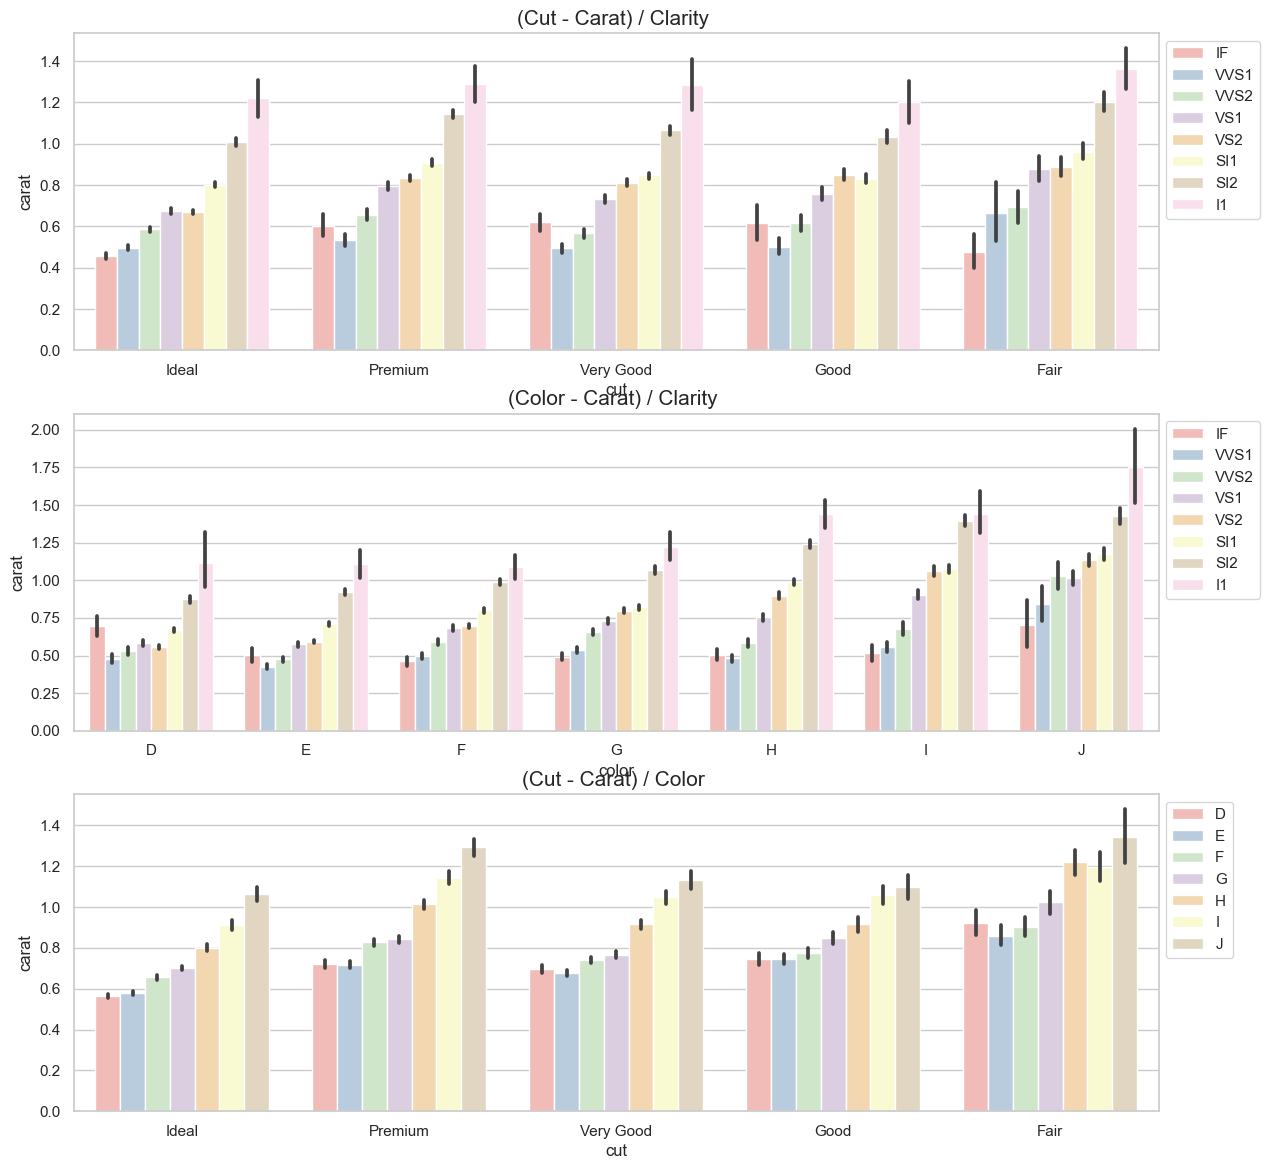

In [32]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

sns.barplot(
    x = 'cut',
    y = 'carat',
    hue = 'clarity',
    data= diamonds,
    order = cut_order,
    hue_order = clarity_order,
    ax = ax1,
)
sns.barplot(
    x = 'color',
    y = 'carat',
    hue = 'clarity',
    data= diamonds,
    order = color_order,
    hue_order = clarity_order,
    ax = ax2,
)
sns.barplot(
    x = 'cut',
    y = 'carat',
    hue = 'color',
    data= diamonds,
    order = cut_order,
    hue_order = color_order,
    ax = ax3,
)
ax1.legend( bbox_to_anchor=(1.0, 1.0))
ax2.legend( bbox_to_anchor=(1.0, 1.0))
ax3.legend( bbox_to_anchor=(1.0, 1.0))
ax1.set_title("(Cut - Carat) / Clarity " , size = 15)
ax2.set_title("(Color - Carat) / Clarity " , size = 15)
ax3.set_title("(Cut - Carat) / Color " , size = 15)
plt.show()

> 등급 조합이 높을 수록 사이즈가 작아지고, 등급 조합이 낮아질 수록 캐럿의 최대 사이즈도 커진다.

> __등급이 낮으면서 캐럿까지 작으면 상품가치가 없기 때문에 낮은 등급은 큰 사이즈 캐럿이 주로 나오는 것으로 생각해 볼 수 있다__

<br>

### 다이아몬드 전체 데이터 상관계수 히트맵

카테고리 데이터도 상관계수 분석을 위해 수치로 변환한 데이터를 사용한다

In [33]:
diamondsV2.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134938,-0.291326,-0.352698,0.029260,0.181783,0.921594,0.977777,0.976860,0.976524
cut,-0.134938,1.000000,0.020719,0.189083,-0.219424,-0.433960,-0.053492,-0.126230,-0.125872,-0.152288
color,-0.291326,0.020719,1.000000,-0.025804,-0.049065,-0.027009,-0.172392,-0.270607,-0.270413,-0.274968
clarity,-0.352698,0.189083,-0.025804,1.000000,-0.067869,-0.160655,-0.146738,-0.372835,-0.367502,-0.376385
depth,0.029260,-0.219424,-0.049065,-0.067869,1.000000,-0.302260,-0.010287,-0.024419,-0.027560,0.097600
table,0.181783,-0.433960,-0.027009,-0.160655,-0.302260,1.000000,0.127057,0.196309,0.190129,0.155802
price,0.921594,-0.053492,-0.172392,-0.146738,-0.010287,0.127057,1.000000,0.887218,0.888812,0.882165
x,0.977777,-0.126230,-0.270607,-0.372835,-0.024419,0.196309,0.887218,1.000000,0.998657,0.991122
y,0.976860,-0.125872,-0.270413,-0.367502,-0.027560,0.190129,0.888812,0.998657,1.000000,0.990781
z,0.976524,-0.152288,-0.274968,-0.376385,0.097600,0.155802,0.882165,0.991122,0.990781,1.000000


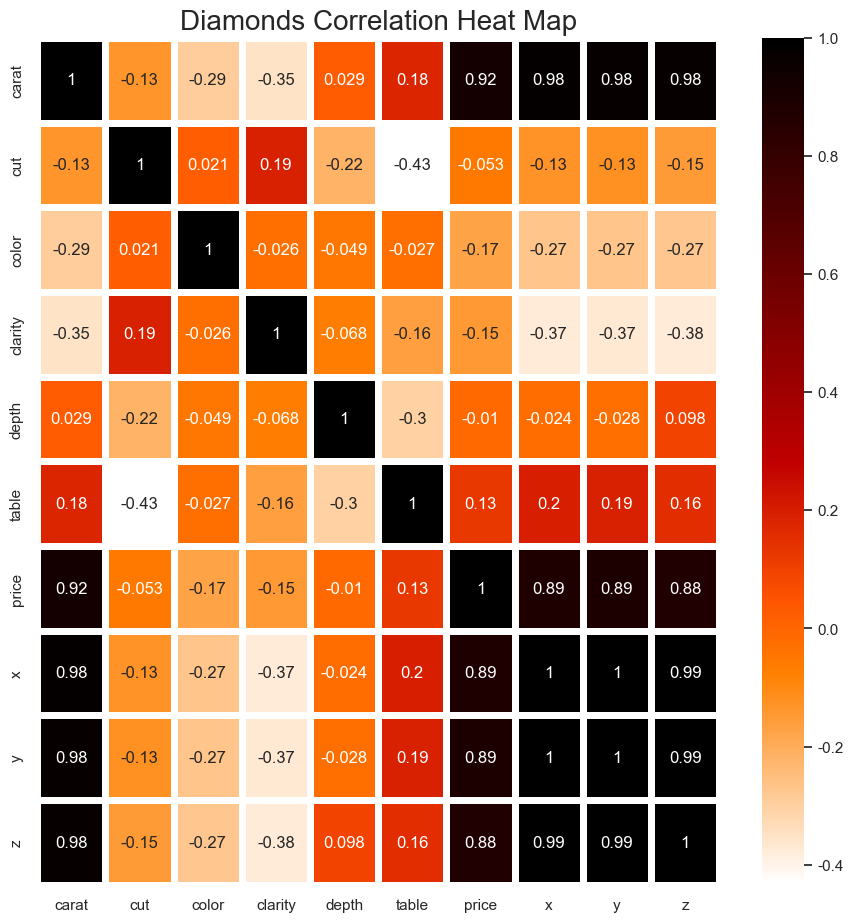

In [34]:
plt.figure(figsize=(11,11))
sns.heatmap(
    diamondsV2.corr(), # data
    annot= True, # 숫자 표기
    linewidths= 5, # 간격
    cmap = 'gist_heat_r',
    cbar= True , # 컬러바
)
plt.title("Diamonds Correlation Heat Map" , size = 20)
plt.show()

> Target인 가격과 __carat__ 의 상관계수가 가장 높고, carat과 상관관계가 높은 __x,y,z__ 가 그 다음으로 __가격과 상관계수가 높다__.                  
> 그 외 컬럼들은 유의미한 관계가 보이지 않지만 선형회귀를 사용하는 것이 아니고 머신러닝을 돌리기 때문에 모든 컬럼을 후보로 두어 분석을 시작한다.                  

<br>

---

<br>
<br>

# __머신러닝__

#### 피쳐 컬럼들의 평균과 중앙값이 비슷하기 때문에 정규화를 하지 않고 머신러닝 만들어 본다

## Feature 와 Target 데이터 분리 / 학습, 검증, 시험 데이터 분리

분석은 모든 컬럼이 수치형인 diamondsV2로 사용한다.  
컬럼이름을 직관적으로 알기 쉽게 변경한다.

In [35]:
diamondsV2.rename(columns = {'depth':'totaldepth', 'x':'length', 'y':'width', 'z':'depth'} , inplace=True)

#### Feature 와 Target 데이터 분리

target은 numpy로 변환하고, 피쳐는 컬럼명을 사용해야 하기 때문에 변환하지 않는다.

In [36]:
dia_target = diamondsV2['price'].to_numpy()
dia_data = diamondsV2.loc[: , diamondsV2.columns != 'price']

#### 학습과 시험데이터 분리

sklearn의 train_test_split import

> 같은 데이터로 여러 모델을 확인하기 위해 random state를 설정한다.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
input_df , test_input_df, target_np, test_target = train_test_split(dia_data , dia_target ,test_size= 0.2, random_state= 42)
print(input_df.shape , test_input_df.shape , target_np.shape , test_target.shape)

(43128, 9) (10783, 9) (43128,) (10783,)


#### 학습 데이터 중 학습과 검증 데이터 분리

In [39]:
train_input_df , val_input_df, train_target, val_target = train_test_split(input_df , target_np ,test_size= 0.2,random_state= 42)
print(train_input_df.shape , val_input_df.shape , train_target.shape , val_target.shape)

(34502, 9) (8626, 9) (34502,) (8626,)


<br>

---

<br>
<br>

## 머신러닝 학습 *Regression Model*
- 답을 같이 학습하는 지도학습
- 분류 Clasification 가 아닌 회귀 Regression을 사용

### __머신러닝의 과정__ 
1. 기본 모든 컬럼으로 머신러닝 만들기 (9개 모델)
2. 학습, 검증세트로 과대,과소적합 판단하기
3. 치환중요도로 피쳐 추리기 _(가장 효율적으로 예측률이 높은 피쳐컬럼 선정 (차원 축소))_
4. 피쳐 줄여서 1~3 반복
5. 모델 2~5개로 추려서 그리드서치 수행 (하이퍼 파라미터 조정)
6. 보팅 모델로 모델 만들기
7. 시험 데이터로 최종 모델 후보 평가하기
8. 시험데이터 결과로 최종 모델 선정하기

In [40]:
train_input_df[0:3]

,carat,cut,color,clarity,totaldepth,table,length,width,depth
36623,0.24,3,6,6,57.7,61.0,4.12,4.13,2.38
20690,1.23,5,4,5,61.4,56.0,6.91,6.96,4.26
45908,0.70,1,2,3,65.0,56.0,5.60,5.50,3.61


### 사용할 함수 정의하기

#### 특성 중요도 그래프 그리는 함수 정의 (치환 중요도)

In [41]:
from sklearn.inspection import permutation_importance  # 치환중요도

# intel MAC
def plot_permutation_importance(model , name):
    train_results = permutation_importance(model, train_input_np, train_target , random_state=42, n_repeats= 10 , n_jobs= -1) 
    train_importance = train_results.importances_mean 
    test_results = permutation_importance(model, test_input_np, test_target , random_state=42, n_repeats= 10 , n_jobs= -1) 
    test_importance = test_results.importances_mean 

    impList = pd.DataFrame(sorted(zip(train_importance , train_input_df.columns)) , columns=['imp','col'])
    testimp = pd.DataFrame(sorted(zip(test_importance , test_input_df.columns)) , columns=['imp','col'])

    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.bar(impList['col'] , impList['imp'])
    ax2.bar(testimp['col'] , testimp['imp'])

    ax1.tick_params(axis='x', labelsize = 10)
    ax2.tick_params(axis='x', labelsize = 10)
    ax1.set_title( name + " Train Permutation Importance")
    ax2.set_title( name + " Test Permutation Importance")
    plt.show() 

#### 학습, 검증 R^2 출력 함수

In [42]:
def checkScore(modelList , nameList):
    for i, model in enumerate(modelList):
        print(nameList[i] , "학습 데이터 R^2 : {:.3f}".format(model.score(train_input_np, train_target)) )
        print(nameList[i] , "검증 데이터 R^2 : {:.3f}".format(model.score(val_input_np, val_target)) )
        print("과대,과소적합 : {:.4f}".format(model.score(train_input_np, train_target) - model.score(val_input_np, val_target)) )

### 기본 컬럼으로 머신러닝 만들기

#### 머신러닝 라이브러리

In [43]:
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트
from sklearn.svm import SVR # SVM
from sklearn.tree import DecisionTreeRegressor # 의사결정나무
from sklearn.ensemble import AdaBoostRegressor  # Ada
from sklearn.linear_model import LinearRegression  # 다중회귀
from sklearn.linear_model import LogisticRegression # 로지스틱회귀 정규화 해야함
from sklearn.ensemble import ExtraTreesRegressor # 앙상블 익스트라트리
from sklearn.ensemble import GradientBoostingRegressor # 앙상블 그래디언트부스팅
from xgboost import XGBRegressor # XGBoost 캐글에서 많이 사용

> 머신러닝 모델 비교를 위해 학습시에도 random_state=42로 고정한다.

In [44]:
# 9개 컬럼 데이터셋 numpy로 변환
train_input_np = train_input_df.to_numpy()
val_input_np = val_input_df.to_numpy()
test_input_np = test_input_df.to_numpy()

svr 모델은 kernel 방식이 rbf와 linear가 있다.   
데이터의 특성에 맞는 방식을 사용해야 하므로 기본모델로 확인해본다.

In [45]:
svrf = SVR(kernel='rbf') 
svrf.fit(train_input_np, train_target) 
print("train 데이터 R^2 : {:.3f}".format(svrf.score(train_input_np, train_target)))
print("val 데이터 R^2 : {:.3f}".format(svrf.score(val_input_np, val_target)))

train 데이터 R^2 : -0.129
val 데이터 R^2 : -0.126


> rbf특성과 다이아몬드데이터가 맞지 않음 rbf는 사용하지 않는다. linear커널로만 사용한다

#### 정규화 한 데이터로 기본 모델 학습

In [46]:
dia_sc = dia_data.copy()

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dia_sc)
print(scaler.data_max_)
dia_sc = scaler.transform(dia_sc)
dia_sc[:3]

[ 5.01  5.    7.    8.   73.6  79.   10.74 10.54  6.98]


array([[0.00623701, 1.        , 0.83333333, 0.14285714, 0.46929825,
        0.2       , 0.03138374, 0.04373178, 0.23011844],
       [0.002079  , 0.75      , 0.83333333, 0.28571429, 0.39473684,
        0.4       , 0.02282454, 0.02332362, 0.20981387],
       [0.00623701, 0.25      , 0.83333333, 0.57142857, 0.26754386,
        0.53333333, 0.04564907, 0.05685131, 0.20981387]])

In [48]:
input_sc , val_input_sc, target_sc, val_target_sc = train_test_split(dia_sc , dia_target ,test_size= 0.2, random_state= 42)
print(input_sc.shape , val_input_sc.shape , target_sc.shape , val_target_sc.shape)

(43128, 9) (10783, 9) (43128,) (10783,)


In [49]:
# knn
knrsc = KNeighborsRegressor() 
knrsc.fit(input_sc, target_sc)

rdfsc = RandomForestRegressor(n_jobs=-1 , random_state=42)
rdfsc.fit(input_sc, target_sc)

# SVM Regression
svrsc = SVR(kernel='linear') 
svrsc.fit(input_sc, target_sc) 

# DecisionTreeRegressor
treesc = DecisionTreeRegressor(random_state=42)
treesc.fit(input_sc, target_sc)

# AdaBoost
adbsc = AdaBoostRegressor(random_state=42)
adbsc.fit(input_sc, target_sc)
# LinearRegression
lnrsc = LinearRegression()
lnrsc.fit(input_sc, target_sc)

# LogisticRegression
logisc = LogisticRegression(random_state=42)
logisc.fit(input_sc, target_sc)

# XGBRegressor
xgbsc = XGBRegressor()
xgbsc.fit(input_sc, target_sc)

# ExtraTreesRegressor
extreesc = ExtraTreesRegressor(n_jobs=-1, random_state=42)
extreesc.fit(input_sc, target_sc)

# GradientBoostingRegressor
gbrsc = GradientBoostingRegressor(random_state=42 )
gbrsc.fit(input_sc, target_sc)

GradientBoostingRegressor(random_state=42)

#### 과대과소 적합과 기본 예측력 확인하기

In [50]:
models = [knrsc, rdfsc , svrsc, treesc, adbsc,  lnrsc, logisc, xgbsc, extreesc, gbrsc ]
mdnames = ["KNeighborsRegressor" , "RandomForest" , "SVM", "DecisionTree", "AdaBoost",  "LinearRegression", "LogisticRegression" ,"XGBoost", "ExtraTrees", "GradientBoosting"]

for i, model in enumerate(models):
    print(mdnames[i] , "학습 데이터 R^2 : {:.3f}".format(model.score(input_sc, target_sc)) )
    print(mdnames[i] , "검증 데이터 R^2 : {:.3f}".format(model.score(val_input_sc, val_target_sc)) )
    print("과대,과소적합 : {:.4f}".format(model.score(input_sc, target_sc) - model.score(val_input_sc, val_target_sc)) )
    print("- - - - - -")

KNeighborsRegressor 학습 데이터 R^2 : 0.982
KNeighborsRegressor 검증 데이터 R^2 : 0.970
과대,과소적합 : 0.0115
- - - - - -
RandomForest 학습 데이터 R^2 : 0.997
RandomForest 검증 데이터 R^2 : 0.982
과대,과소적합 : 0.0150
- - - - - -
SVM 학습 데이터 R^2 : 0.536
SVM 검증 데이터 R^2 : 0.539
과대,과소적합 : -0.0025
- - - - - -
DecisionTree 학습 데이터 R^2 : 1.000
DecisionTree 검증 데이터 R^2 : 0.967
과대,과소적합 : 0.0333
- - - - - -
AdaBoost 학습 데이터 R^2 : 0.914
AdaBoost 검증 데이터 R^2 : 0.909
과대,과소적합 : 0.0054
- - - - - -
LinearRegression 학습 데이터 R^2 : 0.908
LinearRegression 검증 데이터 R^2 : 0.910
과대,과소적합 : -0.0023
- - - - - -
LogisticRegression 학습 데이터 R^2 : 0.008
LogisticRegression 검증 데이터 R^2 : 0.008
과대,과소적합 : 0.0005
- - - - - -
XGBoost 학습 데이터 R^2 : 0.991
XGBoost 검증 데이터 R^2 : 0.982
과대,과소적합 : 0.0085
- - - - - -
ExtraTrees 학습 데이터 R^2 : 1.000
ExtraTrees 검증 데이터 R^2 : 0.983
과대,과소적합 : 0.0175
- - - - - -
GradientBoosting 학습 데이터 R^2 : 0.978
GradientBoosting 검증 데이터 R^2 : 0.977
과대,과소적합 : 0.0010
- - - - - -


> 기본 예측력이 나온다

#### 정규화 하지 않은 데이터로 기본 모델 학습

In [51]:
# knn
knr = KNeighborsRegressor( n_neighbors= 3 , weights='uniform', algorithm='auto', p = 1 ) 
knr.fit(train_input_np , train_target)

# RandomForest
rdf = RandomForestRegressor(n_jobs=-1 , random_state=42)
rdf.fit(train_input_np, train_target)

# SVM Regression
svr = SVR(kernel='linear') 
svr.fit(train_input_np, train_target) 

# DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(train_input_np, train_target)

# AdaBoost
adb = AdaBoostRegressor(random_state=42)
adb.fit(train_input_np, train_target)

# LinearRegression
lnr = LinearRegression()
lnr.fit(train_input_np, train_target)

# XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_input_np, train_target)

# ExtraTreesRegressor
extree = ExtraTreesRegressor(n_jobs=-1, random_state=42)
extree.fit(train_input_np, train_target)

# GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42 )
gbr.fit(train_input_np, train_target)

GradientBoostingRegressor(random_state=42)

### 학습시킨 모델 과대,과소적합 판단을 위한 score 확인하기

In [52]:
models = [knr ,  rdf , svr, tree, adb,  lnr,  xgb, extree, gbr]
mdnames = ["KNN" ,  "RandomForest" , "SVM", "DecisionTree", "AdaBoost",  "LinearRegression",  "XGBoost", "ExtraTrees", "GradientBoosting"]
checkScore(models , mdnames)

KNN 학습 데이터 R^2 : 0.983
KNN 검증 데이터 R^2 : 0.964
과대,과소적합 : 0.0190
RandomForest 학습 데이터 R^2 : 0.997
RandomForest 검증 데이터 R^2 : 0.981
과대,과소적합 : 0.0161
SVM 학습 데이터 R^2 : 0.810
SVM 검증 데이터 R^2 : 0.810
과대,과소적합 : -0.0004
DecisionTree 학습 데이터 R^2 : 1.000
DecisionTree 검증 데이터 R^2 : 0.967
과대,과소적합 : 0.0334
AdaBoost 학습 데이터 R^2 : 0.916
AdaBoost 검증 데이터 R^2 : 0.912
과대,과소적합 : 0.0041
LinearRegression 학습 데이터 R^2 : 0.909
LinearRegression 검증 데이터 R^2 : 0.904
과대,과소적합 : 0.0047
XGBoost 학습 데이터 R^2 : 0.992
XGBoost 검증 데이터 R^2 : 0.981
과대,과소적합 : 0.0107
ExtraTrees 학습 데이터 R^2 : 1.000
ExtraTrees 검증 데이터 R^2 : 0.982
과대,과소적합 : 0.0184
GradientBoosting 학습 데이터 R^2 : 0.978
GradientBoosting 검증 데이터 R^2 : 0.976
과대,과소적합 : 0.0022


> 예측력이 높고 적당한 과대 적합 수치를 가진 모델 : KNN, 랜덤포레스트, AdaBoost , LinearRegression , XGBoost , ExtraTrees , GradientBoosting                
> 제외 모델 : SVM, DecisionTree            
> R^2값의 차가 큰 것과 randomforest는 decisiontree의 앙상블 모델이기 때문에 제한다

#### 정규화 한 모델과 정규화 하지 않은 모델 비교 이유
__어플이나 웹 개발에 사용해야 하는 모델을 개발할 때에 정규화를 하는 경우,  
 어플에서도 정규화를 하고, 풀어주는 과정이 추가로 생기게 되어 가능한 정규화를 하지 않는것이 개발에 이용하기 편리하다.  
따라서 정규화로 인해 예측력이 크게 차이가 나지 않을 경우에는 정규화를 하지 않고 모델을 만드는 것이 좋다.__

__*다이아몬드 데이터의 경우 정규화를 하지 않고도 예측력이 잘 나왔기 때문에 정규화를 하지 않은 데이터를 사용한다.*__

### 치환 중요도 Barplot으로 피쳐 중요도 확인하기

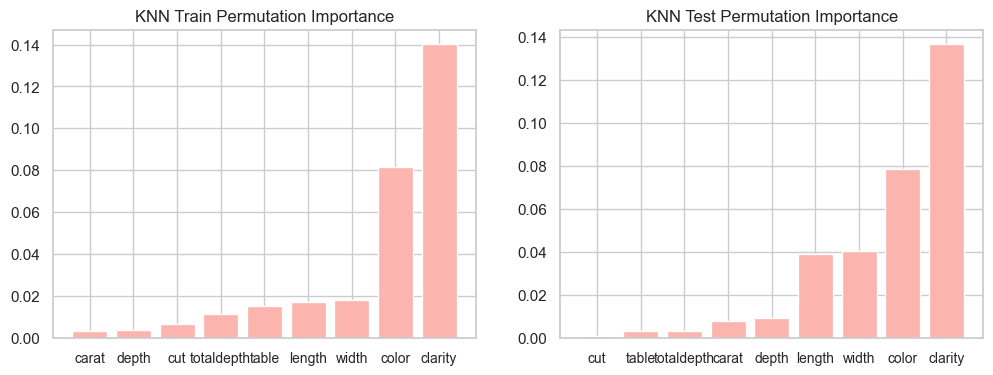

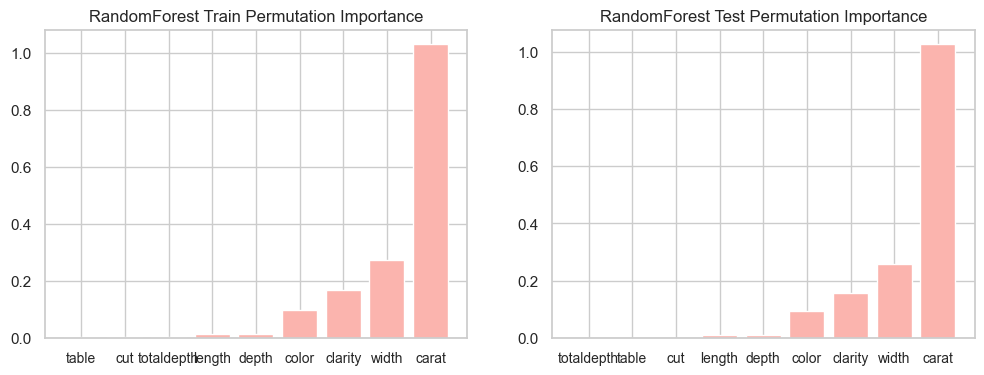

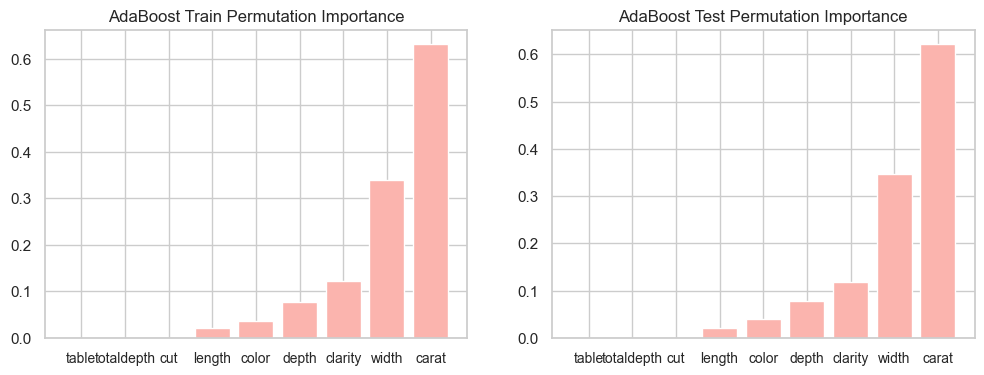

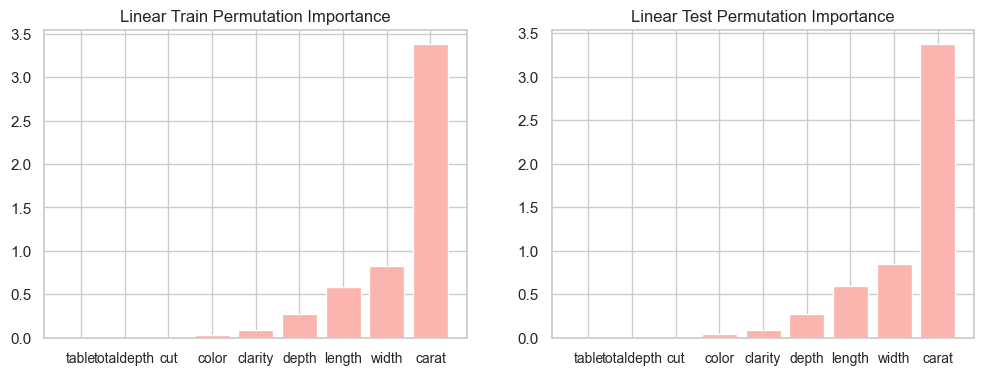

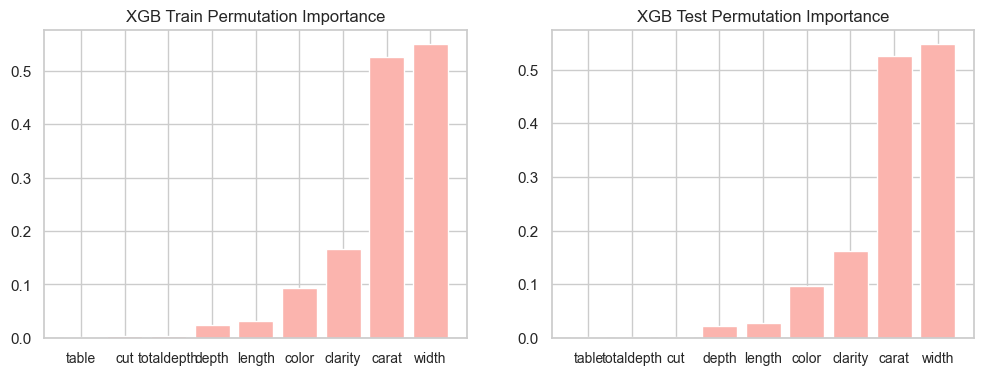

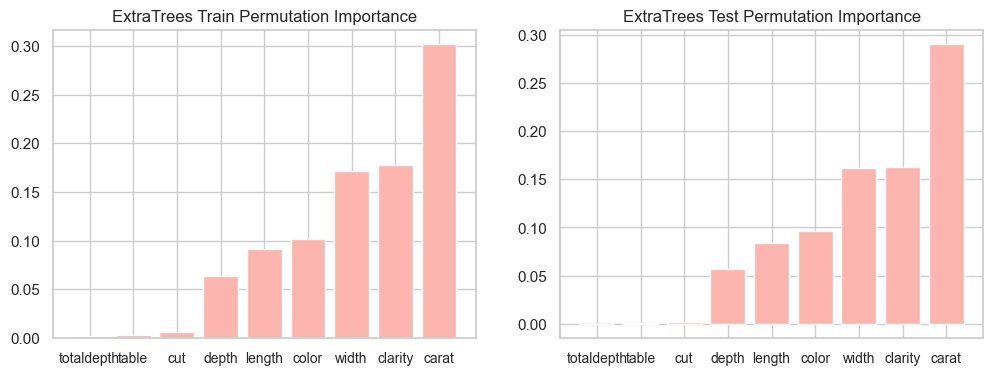

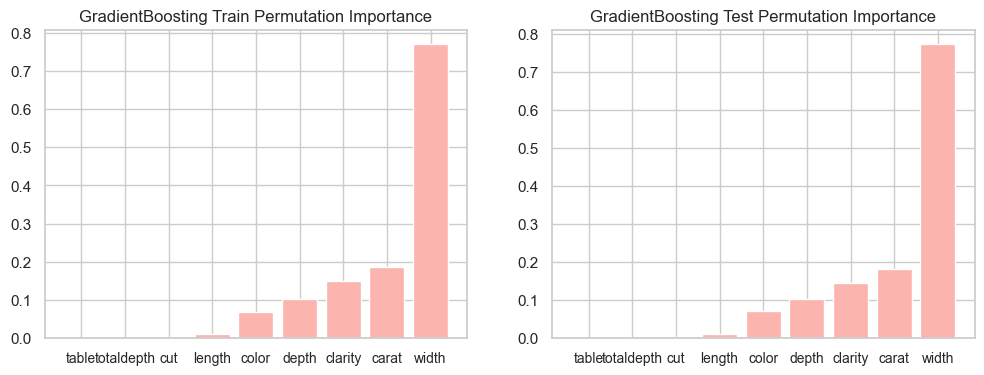

In [53]:
plot_permutation_importance(knr , "KNN")
plot_permutation_importance(rdf , "RandomForest")
plot_permutation_importance(adb , "AdaBoost")
plot_permutation_importance(lnr , "Linear")
plot_permutation_importance(xgb , "XGB")
plot_permutation_importance(extree , "ExtraTrees")
plot_permutation_importance(gbr , "GradientBoosting")

> 공통적인 상위 TOP 컬럼 : width, carat, clarity, color           
> KNN 외 모든 모델들은 table, total, cut의 중요도가 거의 없다.        

### 공통적으로 중요도가 낮은 컬럼 제하고 모델 만들기 (2번째 모델)

__cut, table, totaldepth 컬럼 제거__

In [54]:
train_input_df.drop(['table','totaldepth','cut'] , axis=1 , inplace= True)
val_input_df.drop(['table','totaldepth','cut'] , axis=1 , inplace= True)
test_input_df.drop(['table','totaldepth','cut'] , axis=1 , inplace= True)

# 6개 컬럼 데이터셋 numpy로 변환
train_input_np = train_input_df.to_numpy()
val_input_np = val_input_df.to_numpy()
test_input_np = test_input_df.to_numpy()

### 6개 모델 학습 및 R^2값 확인

In [55]:
# knn
knr = KNeighborsRegressor( n_neighbors= 3 , weights='uniform', algorithm='auto', p = 1 ) 
knr.fit(train_input_np , train_target)

# RandomForest
rdf = RandomForestRegressor(n_jobs=-1 , random_state=42)
rdf.fit(train_input_np, train_target)

# AdaBoost
adb = AdaBoostRegressor(random_state=42)
adb.fit(train_input_np, train_target)

# LinearRegression
lnr = LinearRegression()
lnr.fit(train_input_np, train_target)

# XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_input_np, train_target)

# ExtraTreesRegressor
extree = ExtraTreesRegressor(n_jobs=-1, random_state=42)
extree.fit(train_input_np, train_target)

# GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42 )
gbr.fit(train_input_np, train_target)

GradientBoostingRegressor(random_state=42)

In [56]:
models = [knr ,  rdf , adb,  lnr,  xgb, extree ,gbr]
mdnames = ["KNN" ,  "RandomForest" , "AdaBoost",  "LinearRegression",  "XGBoost", "ExtraTrees", "GradientBoosting"]
checkScore(models , mdnames)

KNN 학습 데이터 R^2 : 0.989
KNN 검증 데이터 R^2 : 0.976
과대,과소적합 : 0.0128
RandomForest 학습 데이터 R^2 : 0.997
RandomForest 검증 데이터 R^2 : 0.980
과대,과소적합 : 0.0173
AdaBoost 학습 데이터 R^2 : 0.919
AdaBoost 검증 데이터 R^2 : 0.915
과대,과소적합 : 0.0042
LinearRegression 학습 데이터 R^2 : 0.907
LinearRegression 검증 데이터 R^2 : 0.902
과대,과소적합 : 0.0047
XGBoost 학습 데이터 R^2 : 0.991
XGBoost 검증 데이터 R^2 : 0.980
과대,과소적합 : 0.0113
ExtraTrees 학습 데이터 R^2 : 1.000
ExtraTrees 검증 데이터 R^2 : 0.979
과대,과소적합 : 0.0205
GradientBoosting 학습 데이터 R^2 : 0.977
GradientBoosting 검증 데이터 R^2 : 0.975
과대,과소적합 : 0.0025


> 전체적으로 R^2도 높고, 학습,검증 데이터 스코어의 차이도 적다           
> 예측력이 전반적으로 낮게 나온 LinearRegression, AdaBoost 모델을 제외한다

### 치환중요도 그래프 확인

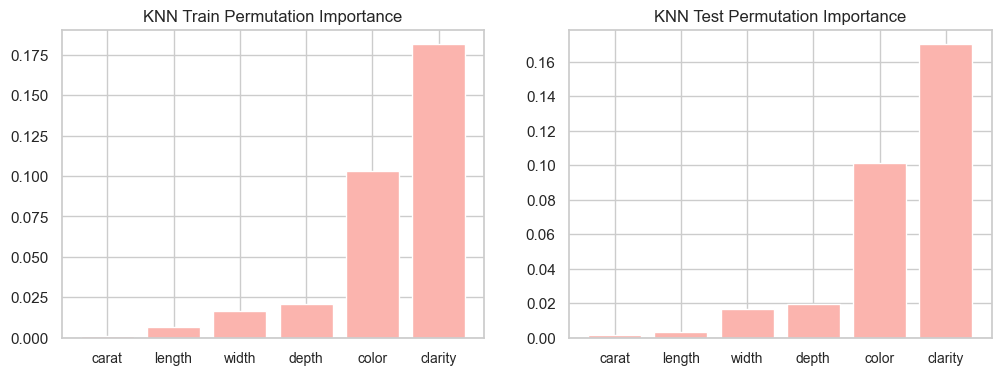

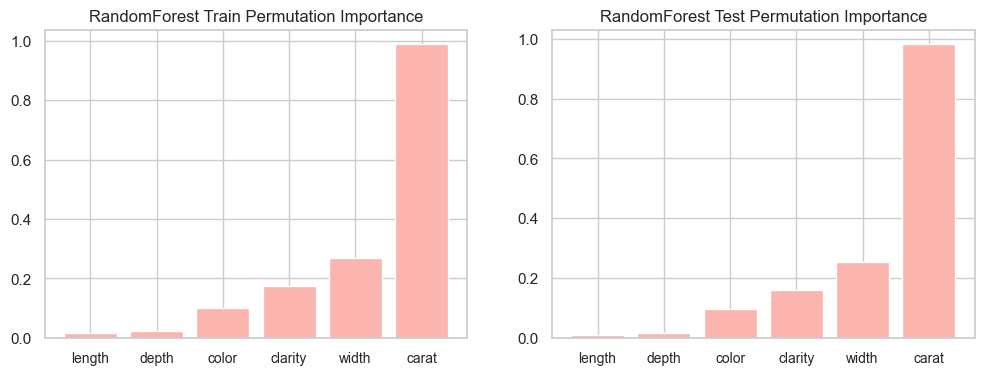

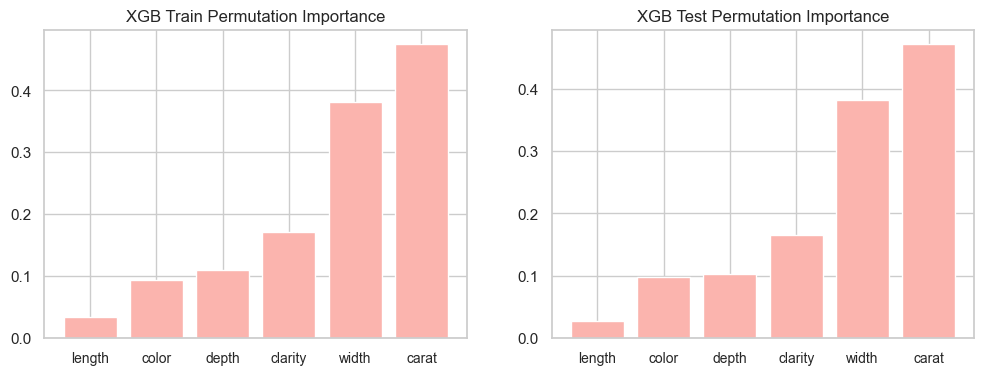

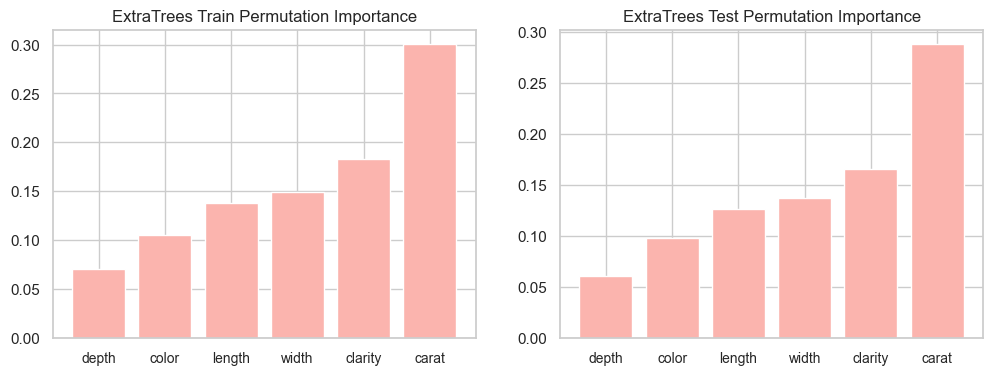

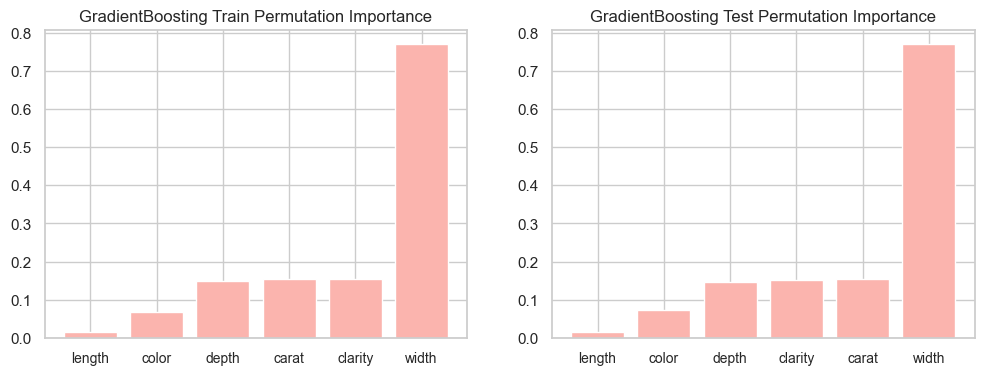

In [57]:
plot_permutation_importance(knr , "KNN")
plot_permutation_importance(rdf , "RandomForest")
plot_permutation_importance(xgb , "XGB")
plot_permutation_importance(extree , "ExtraTrees")
plot_permutation_importance(gbr , "GradientBoosting")

> KNN을 제외한 모델에서 carat , width 은 공통적으로 중요도가 높다.           
> clarity도 6개중 5개의 모델에서 TOP3안에 든다.          
> length와 color , depth 컬럼을 제거해본다.                
> 머신러닝을 사용하기 위한 최소 피쳐컬럼 갯수는 3개 이므로 width, clarity, carat 컬럼만 사용하여 모델을 만들어 본다.                         

### 3번째 모델 학습 
머신러닝 최소 피쳐컬럼 갯수인 3개로 만들기

In [58]:
train_input_df.drop(['length' , 'color', 'depth'] , axis=1 , inplace= True)
val_input_df.drop(['length' , 'color', 'depth'] , axis=1 , inplace= True)
test_input_df.drop(['length' , 'color', 'depth'] , axis=1 , inplace= True)
# 3개 컬럼 데이터셋 numpy로 변환
train_input_np = train_input_df.to_numpy()
val_input_np = val_input_df.to_numpy()
test_input_np = test_input_df.to_numpy()

In [59]:
# knn
knr = KNeighborsRegressor( n_neighbors= 3 , weights='uniform', algorithm='auto', p = 1 ) 
knr.fit(train_input_np , train_target)

# RandomForest
rdf = RandomForestRegressor(n_jobs=-1 , random_state=42)
rdf.fit(train_input_np, train_target)

# XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_input_np, train_target)

# ExtraTreesRegressor
extree = ExtraTreesRegressor(n_jobs=-1, random_state=42)
extree.fit(train_input_np, train_target)

# GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42 )
gbr.fit(train_input_np, train_target)

GradientBoostingRegressor(random_state=42)

In [60]:
models = [knr ,  rdf ,  xgb, extree ,gbr]
mdnames = ["KNN" ,  "RandomForest" ,  "XGBoost", "ExtraTrees", "GradientBoosting"]
checkScore(models , mdnames)

KNN 학습 데이터 R^2 : 0.957
KNN 검증 데이터 R^2 : 0.922
과대,과소적합 : 0.0356
RandomForest 학습 데이터 R^2 : 0.976
RandomForest 검증 데이터 R^2 : 0.923
과대,과소적합 : 0.0527
XGBoost 학습 데이터 R^2 : 0.958
XGBoost 검증 데이터 R^2 : 0.934
과대,과소적합 : 0.0237
ExtraTrees 학습 데이터 R^2 : 0.981
ExtraTrees 검증 데이터 R^2 : 0.910
과대,과소적합 : 0.0711
GradientBoosting 학습 데이터 R^2 : 0.943
GradientBoosting 검증 데이터 R^2 : 0.937
과대,과소적합 : 0.0057


> R^2값은 떨어지고, 과대적합이 커지고 있다. 

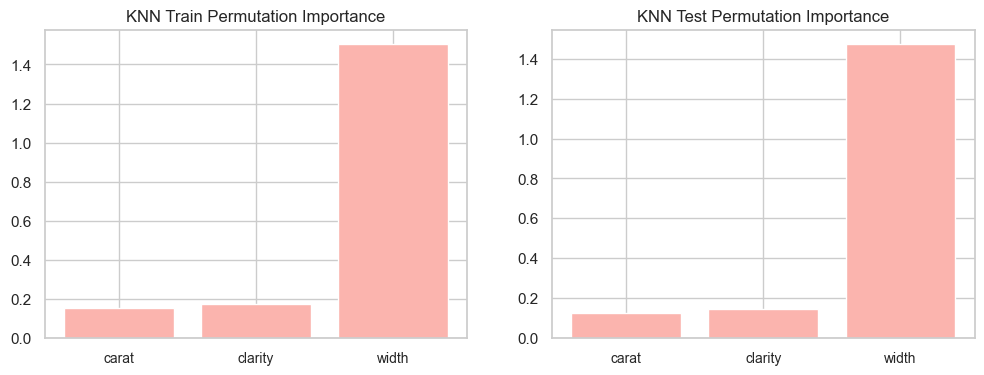

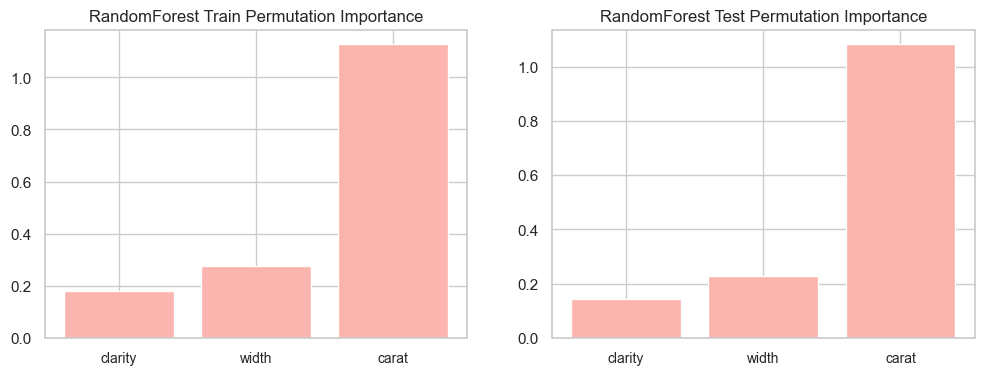

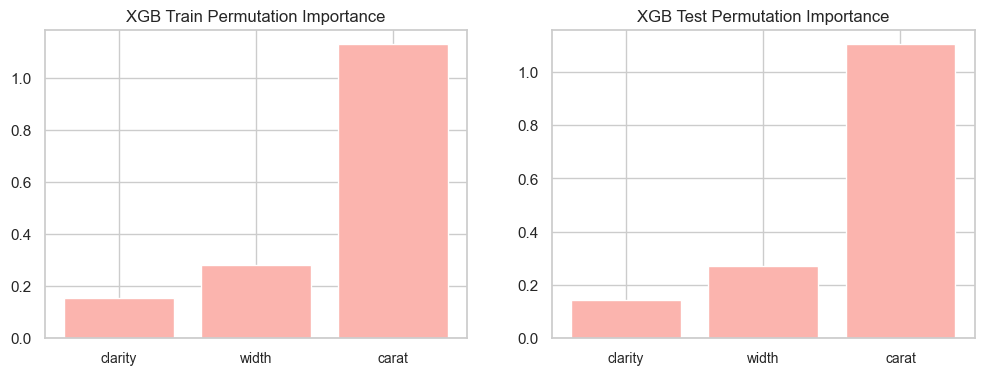

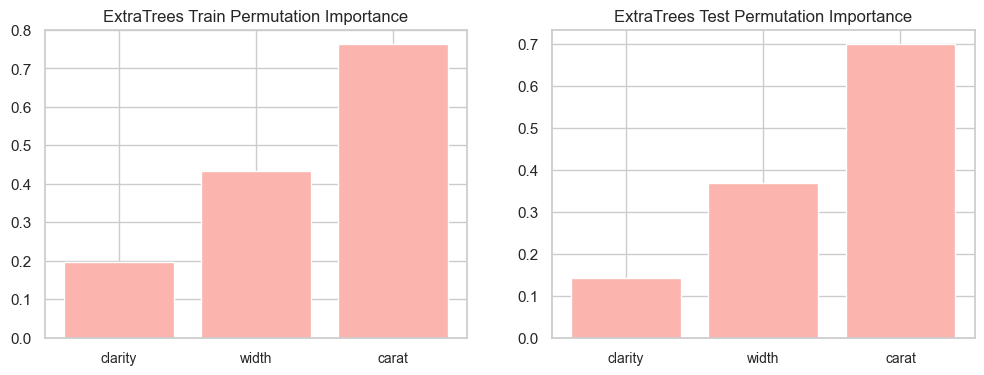

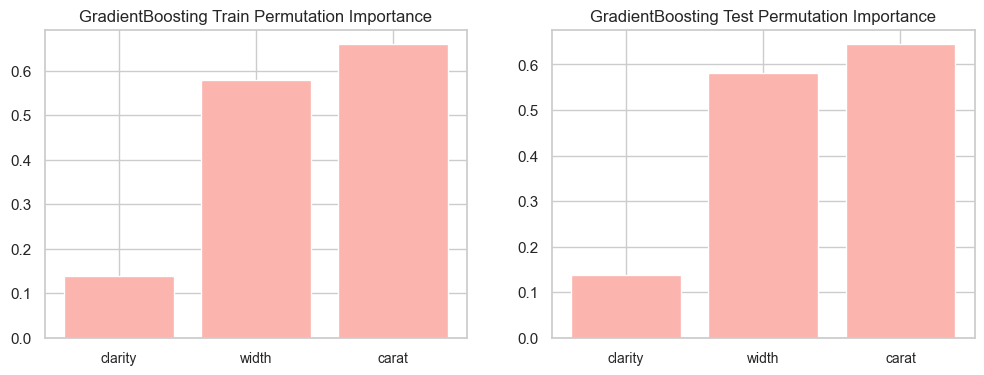

In [61]:
plot_permutation_importance(knr , "KNN")
plot_permutation_importance(rdf , "RandomForest")
plot_permutation_importance(xgb , "XGB")
plot_permutation_importance(extree , "ExtraTrees")
plot_permutation_importance(gbr , "GradientBoosting")

### 그리드서치로 하이퍼파라미터 조정한 모델 만들기

In [62]:
from sklearn.model_selection import GridSearchCV

def param_selection(modelname, input, target, nfolds):
    if modelname == "knr" : # KNN
        parameters = [
            {
                'n_neighbors' : [3,5,7,10,30], # 이웃수
                'p' : [1,2], # 거리 계산 방법
                'weights' : ['uniform','distance'],
            }
        ]
        modelchoice = KNeighborsRegressor()
    elif modelname == "rdf" : # RandomForestRegressor
        parameters = [
            {
                'max_depth' : [3,6,7], # 트리 깊이
                'n_estimators' : [10, 50, 100, 150, 200], # 트리 갯수 
                'n_jobs' : [-1],
            }
        ]
        modelchoice = RandomForestRegressor()
    elif modelname == "xgb" : # XGBRegressor
        parameters = [
            {
                'booster' : [ 'gbtree', 'gblinear', 'dart'], # 
                'n_jobs' : [-1],
                'learning_rate' : [0.1, 0.3], # 
                'n_estimators' : [50, 100, 150], # 트리 갯수 
            }
        ]
        modelchoice = XGBRegressor()
    elif modelname == "extree" : # ExtraTreesRegressor
        parameters = [
            {
                # 'max_depth' : [4,6], # 
                'n_jobs' : [-1],
                'n_estimators' : [50, 100, 150], # 트리 갯수 
            }
        ]
        modelchoice = ExtraTreesRegressor()
    elif modelname == "gbr" : # GradientBoostingRegressor
        parameters = [
            {
                'loss' : [ 'squared_error', 'absolute_error', 'huber','quantile'], # 
                'learning_rate' : [0.001, 0.01, 0.1], # 
                'n_estimators' : [50, 100, 150], # 트리 갯수 
                # 'max_depth' : [4,6], # 
            }
        ]
        modelchoice = GradientBoostingRegressor()
    
    # -----
    model = GridSearchCV(
            modelchoice, # 무슨 모델 쓸거야
            parameters, # 옵션들 한번에 입력 
            cv = nfolds # 교차검증 횟수 10번
            )
    model.fit(input , target) # 학습
    print(model.best_params_) # best_params_ : 최적의 결과값
    return model


In [63]:
input_np = input_df[['carat','clarity','width']].to_numpy()

__교차검증을 해주기 때문에 train / val 이 아니라 input / test로 비교한다__

In [64]:
knr_cv = param_selection("knr", input_np, target_np, 10)

{'n_neighbors': 30, 'p': 2, 'weights': 'uniform'}


In [65]:
rdf_cv = param_selection("rdf", input_np, target_np, 10)

{'max_depth': 7, 'n_estimators': 200, 'n_jobs': -1}


In [66]:
xgb_cv = param_selection("xgb", input_np, target_np, 10)

In [ ]:
extree_cv = param_selection("extree", input_np, target_np, 10)

{'n_estimators': 150, 'n_jobs': -1}


In [ ]:
gbr_cv = param_selection("gbr" , input_np, target_np, 10)

KeyboardInterrupt: 

In [ ]:
models = [knr_cv ,  rdf_cv ,  xgb_cv, extree_cv ,gbr_cv]
mdnames = ["KNN" ,  "RandomForest" ,  "XGBoost", "ExtraTrees", "GradientBoosting"]

for i, model in enumerate(models):
    print(mdnames[i] , "학습 데이터 R^2 : {:.3f}".format(model.score(input_np, target_np)) )
    print(mdnames[i] , "시험 데이터 R^2 : {:.3f}".format(model.score(test_input_np, test_target)) )
    print("과대,과소적합 : {:.4f}".format(model.score(input_np, target_np) - model.score(test_input_np, test_target)) )

KNN 학습 데이터 R^2 : 0.943
KNN 시험 데이터 R^2 : 0.937
과대,과소적합 : 0.0061
RandomForest 학습 데이터 R^2 : 0.942
RandomForest 시험 데이터 R^2 : 0.937
과대,과소적합 : 0.0053
XGBoost 학습 데이터 R^2 : 0.946
XGBoost 시험 데이터 R^2 : 0.939
과대,과소적합 : 0.0075
ExtraTrees 학습 데이터 R^2 : 0.977
ExtraTrees 시험 데이터 R^2 : 0.913
과대,과소적합 : 0.0640
GradientBoosting 학습 데이터 R^2 : 0.943
GradientBoosting 시험 데이터 R^2 : 0.938
과대,과소적합 : 0.0054


> 보팅모델은 하이퍼파라미터를 설정하지 않고 만든다(모델 갯수는 홀수)  
> 그리드서치로 하이퍼파라미터를 조정한 모델과 보팅 모델을 비교해본다.

In [ ]:
from sklearn.ensemble import VotingRegressor

voting_fivemodel = VotingRegressor(
    n_jobs= -1,
    estimators = [('knn', knr) , ('randomforest',rdf,), ('xgboost', xgb), ('extratree', extree), ('gradient', gbr)],
    weights=[0.8, 0.9, 1, 0.8, 1],
    verbose= True
).fit(input_np, target_np)

voting_threemodel = VotingRegressor(
    n_jobs= -1,
    estimators = [('randomforest',rdf,), ('xgboost', xgb), ('gradient', gbr)],
    weights=[ 0.9, 1, 1],
    verbose= True
).fit(input_np, target_np)

print("시험 데이터 스코어 :", voting_fivemodel.score(test_input_np, test_target) ,"&", voting_threemodel.score(test_input_np, test_target))

[Voting] ...................... (1 of 5) Processing knn, total=   0.0s
[Voting] ................ (4 of 5) Processing extratree, total=   0.7s
[Voting] ............. (2 of 5) Processing randomforest, total=   0.9s
[Voting] .................. (3 of 5) Processing xgboost, total=   1.3s
[Voting] ................. (5 of 5) Processing gradient, total=   1.4s
[Voting] ............. (1 of 3) Processing randomforest, total=   0.6s
[Voting] .................. (2 of 3) Processing xgboost, total=   1.0s
[Voting] ................. (3 of 3) Processing gradient, total=   1.4s
시험 데이터 스코어 : 0.9324716658406624 & 0.9354886145988031


### 만들어진 모든 모델로 시험 데이터 테스트

In [ ]:
models = [knr,knr_cv,rdf,rdf_cv,xgb,xgb_cv,extree,extree_cv,gbr,gbr_cv,voting_fivemodel,voting_threemodel]
mdnames = ["KNN","KNN CV","RandomForest","RandomForest CV","XGBoost","XGBoost CV", "ExtraTrees","ExtraTrees CV", "GradientBoosting","GradientBoosting CV","VotingFive","VotingThree"]
for i, model in enumerate(models):
    print(mdnames[i],"- Test Score : {:.5f}".format(model.score(test_input_np, test_target)))

KNN - Test Score : 0.91955
KNN CV - Test Score : 0.93705
RandomForest - Test Score : 0.92137
RandomForest CV - Test Score : 0.93721
XGBoost - Test Score : 0.93298
XGBoost CV - Test Score : 0.93854
ExtraTrees - Test Score : 0.91212
ExtraTrees CV - Test Score : 0.91344
GradientBoosting - Test Score : 0.93757
GradientBoosting CV - Test Score : 0.93758
VotingFive - Test Score : 0.93247
VotingThree - Test Score : 0.93549


> 최종 순위 : XGBoostCV - GradientCV - GradientBoosting - RandomForestCV -  KNNCV - Voting2 - XGBoost - Voting  ~//~  KNN, Extra, ExtraCV, RandomForest,

### 정확도 잘 나온 모델들 값 넣어서 예측해보기

In [ ]:
testDia = [ # carat , clarity , width
    [2.2 , 5, 8.3],
    ]
models = [xgb_cv, gbr_cv, gbr, rdf_cv, knr_cv, voting_threemodel, xgb, voting_fivemodel]
mdnames = ["XGBoost CV","GradientBoosting CV","GradientBoosting","RandomForest CV","KNN CV","VotingThree","XGBoost","VotingFive"]

for i, model in enumerate(models):
    print(mdnames[i],"Predict : ", model.predict(testDia) )

XGBoost CV Predict :  [15984.706]
GradientBoosting CV Predict :  [16340.64013736]
GradientBoosting Predict :  [16129.1653106]
RandomForest CV Predict :  [15897.69609459]
KNN CV Predict :  [16112.13333333]
VotingThree Predict :  [15972.46888545]
XGBoost Predict :  [15529.84]
VotingFive Predict :  [15738.8799484]


In [ ]:
diamondsV2[(diamondsV2['clarity'] >= 5 )&(diamondsV2['carat'] >= 2.0)]

NameError: name 'diamondsV2' is not defined

> __가격 예측에도 큰 이상이 없으므로 최종모델로 XGBoost GridSearchCV 모델을 선정한다.__

<br>
<br>

---

<br>

### 전체 데이터 셋으로 최종 모델 학습

In [ ]:
dia_numpy = dia_data[['carat','clarity','width']].to_numpy()

{'booster': 'dart', 'learning_rate': 0.1, 'n_estimators': 50, 'n_jobs': -1}

In [ ]:
# XGBRegressor
finalxgb = XGBRegressor(booster = 'dart' , learning_rate = 0.1 , n_estimators = 50 , n_jobs = -1)
finalxgb.fit(dia_numpy, dia_target)

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 최종 모델 h5 파일로 저장 & 불러와서 예측 확인

In [ ]:
import joblib
fileName = "best_diamond_price_predict.h5"
joblib.dump(finalxgb , fileName)

In [ ]:
xgbL = joblib.load("best_diamond_price_predict.h5")

사용자가 입력할 데이터로 시험 예측

In [ ]:
pred = xgbL.predict( [ # carat , clarity , width
    [1.5 , 1, 4.8],
    ])
print(pred)

<br>
<br>

---